# Section 4 - Empirical analysis

## 4.1 - Preliminary results

In [1]:
%reset -f

In [2]:
import pandas as pd
import numpy as np
from dadapy import Data
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.gaussian_process.kernels as k
from datetime import datetime
from matplotlib.dates import date2num
from sklearn.gaussian_process import GaussianProcessRegressor
from scipy.interpolate import interp1d

plt.rcParams['text.usetex'] = True

In [3]:
df = pd.read_excel('../Data/Dataset_eua_IMv4.3.xlsx')
df_ = df.drop(df.columns[[0,1]], axis=1)
# df_.describe().T[['mean', 'std', 'min', '25%', '50%', '75%','max']].to_excel('../Data/DescriptiveStatistics.xlsx')

In [4]:
df2 = pd.read_excel('../Data/Dataset_eua_Macro_V1.xlsx')
df2 = df2.drop(df2.columns[[0,1,2, 3, 5, 7, 8, 9, 10, 11]], axis=1)
# df2.describe().T[['mean', 'std', 'min', '25%', '50%', '75%','max']].to_excel('../Data/DescriptiveStatisticsMacro.xlsx')

In [5]:
df3 = pd.concat([df_.describe().T[['mean', 'std', 'min', '25%', '50%', '75%','max']], df2.describe().T[['mean', 'std', 'min', '25%', '50%', '75%','max']]], axis=1)
#df3.to_excel('../Data/DescriptiveStatisticsAll.xlsx')

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from scipy.stats import pearsonr
from datetime import datetime

In [7]:
df = pd.read_excel('../Data/Dataset_eua_IMv4.3.xlsx')

In [8]:
df_ = df.drop(df.columns[[0,1]], axis=1)
target = df['eua_last']
target_ = target.values
date = df['Date']

In [9]:
X_labels = np.array(['EUA','GPR', 'VSTOXX', 'Unc. EUR/USD', 'Unc. EUR/JPY', 'Unc. EUR/GBP', 'Unc. EUR/CHF',
       'Nat. Gas', 'Elec. p. SPAIN', 'Elec. p. GER', 'Elec. p. IT',
       'Elec. p. FR', 'Brent Oil', 'Coal', 'Gold', 'EUR/USD Spot',
       'EUR/JPY Spot', 'EUR/GBP Spot', 'EUR/CHF Spot',
       'Bloom. Energy p. ind.', 'Sol. ESG fossil ind.',
       'SP Euro50 Env. ind.', 'MSCI Ener. sec. ind.', 'ERIX ind.', 'EUROnext100', 'IBEX35', 'DAX',
       'CAC', 'FTSEmib', 'EUROSTOXX Elec. ind.', '10 Year Bond y.', '3 Month Bond y.'])
df_.columns = X_labels

In [10]:
X_3 = df_.iloc[0:1782,:]
correlations_3 = X_3.corrwith(df_["EUA"])
correlations_3 = correlations_3.sort_values(ascending=False)
correlations_3 = correlations_3[1:]

In [11]:
NUM_COLORS1 = 31
cm = plt.get_cmap('Wistia')
colors1 = [cm(1.*i/NUM_COLORS1) for i in range(NUM_COLORS1)]
colors1_test = np.array(colors1)
colors1_test = colors1_test[::-1]

color1_1 = colors1_test[0]
color1_2 = colors1_test[1]
color1_3 = colors1_test[2]
color1_4 = colors1_test[3]
color1_5 = colors1_test[4]

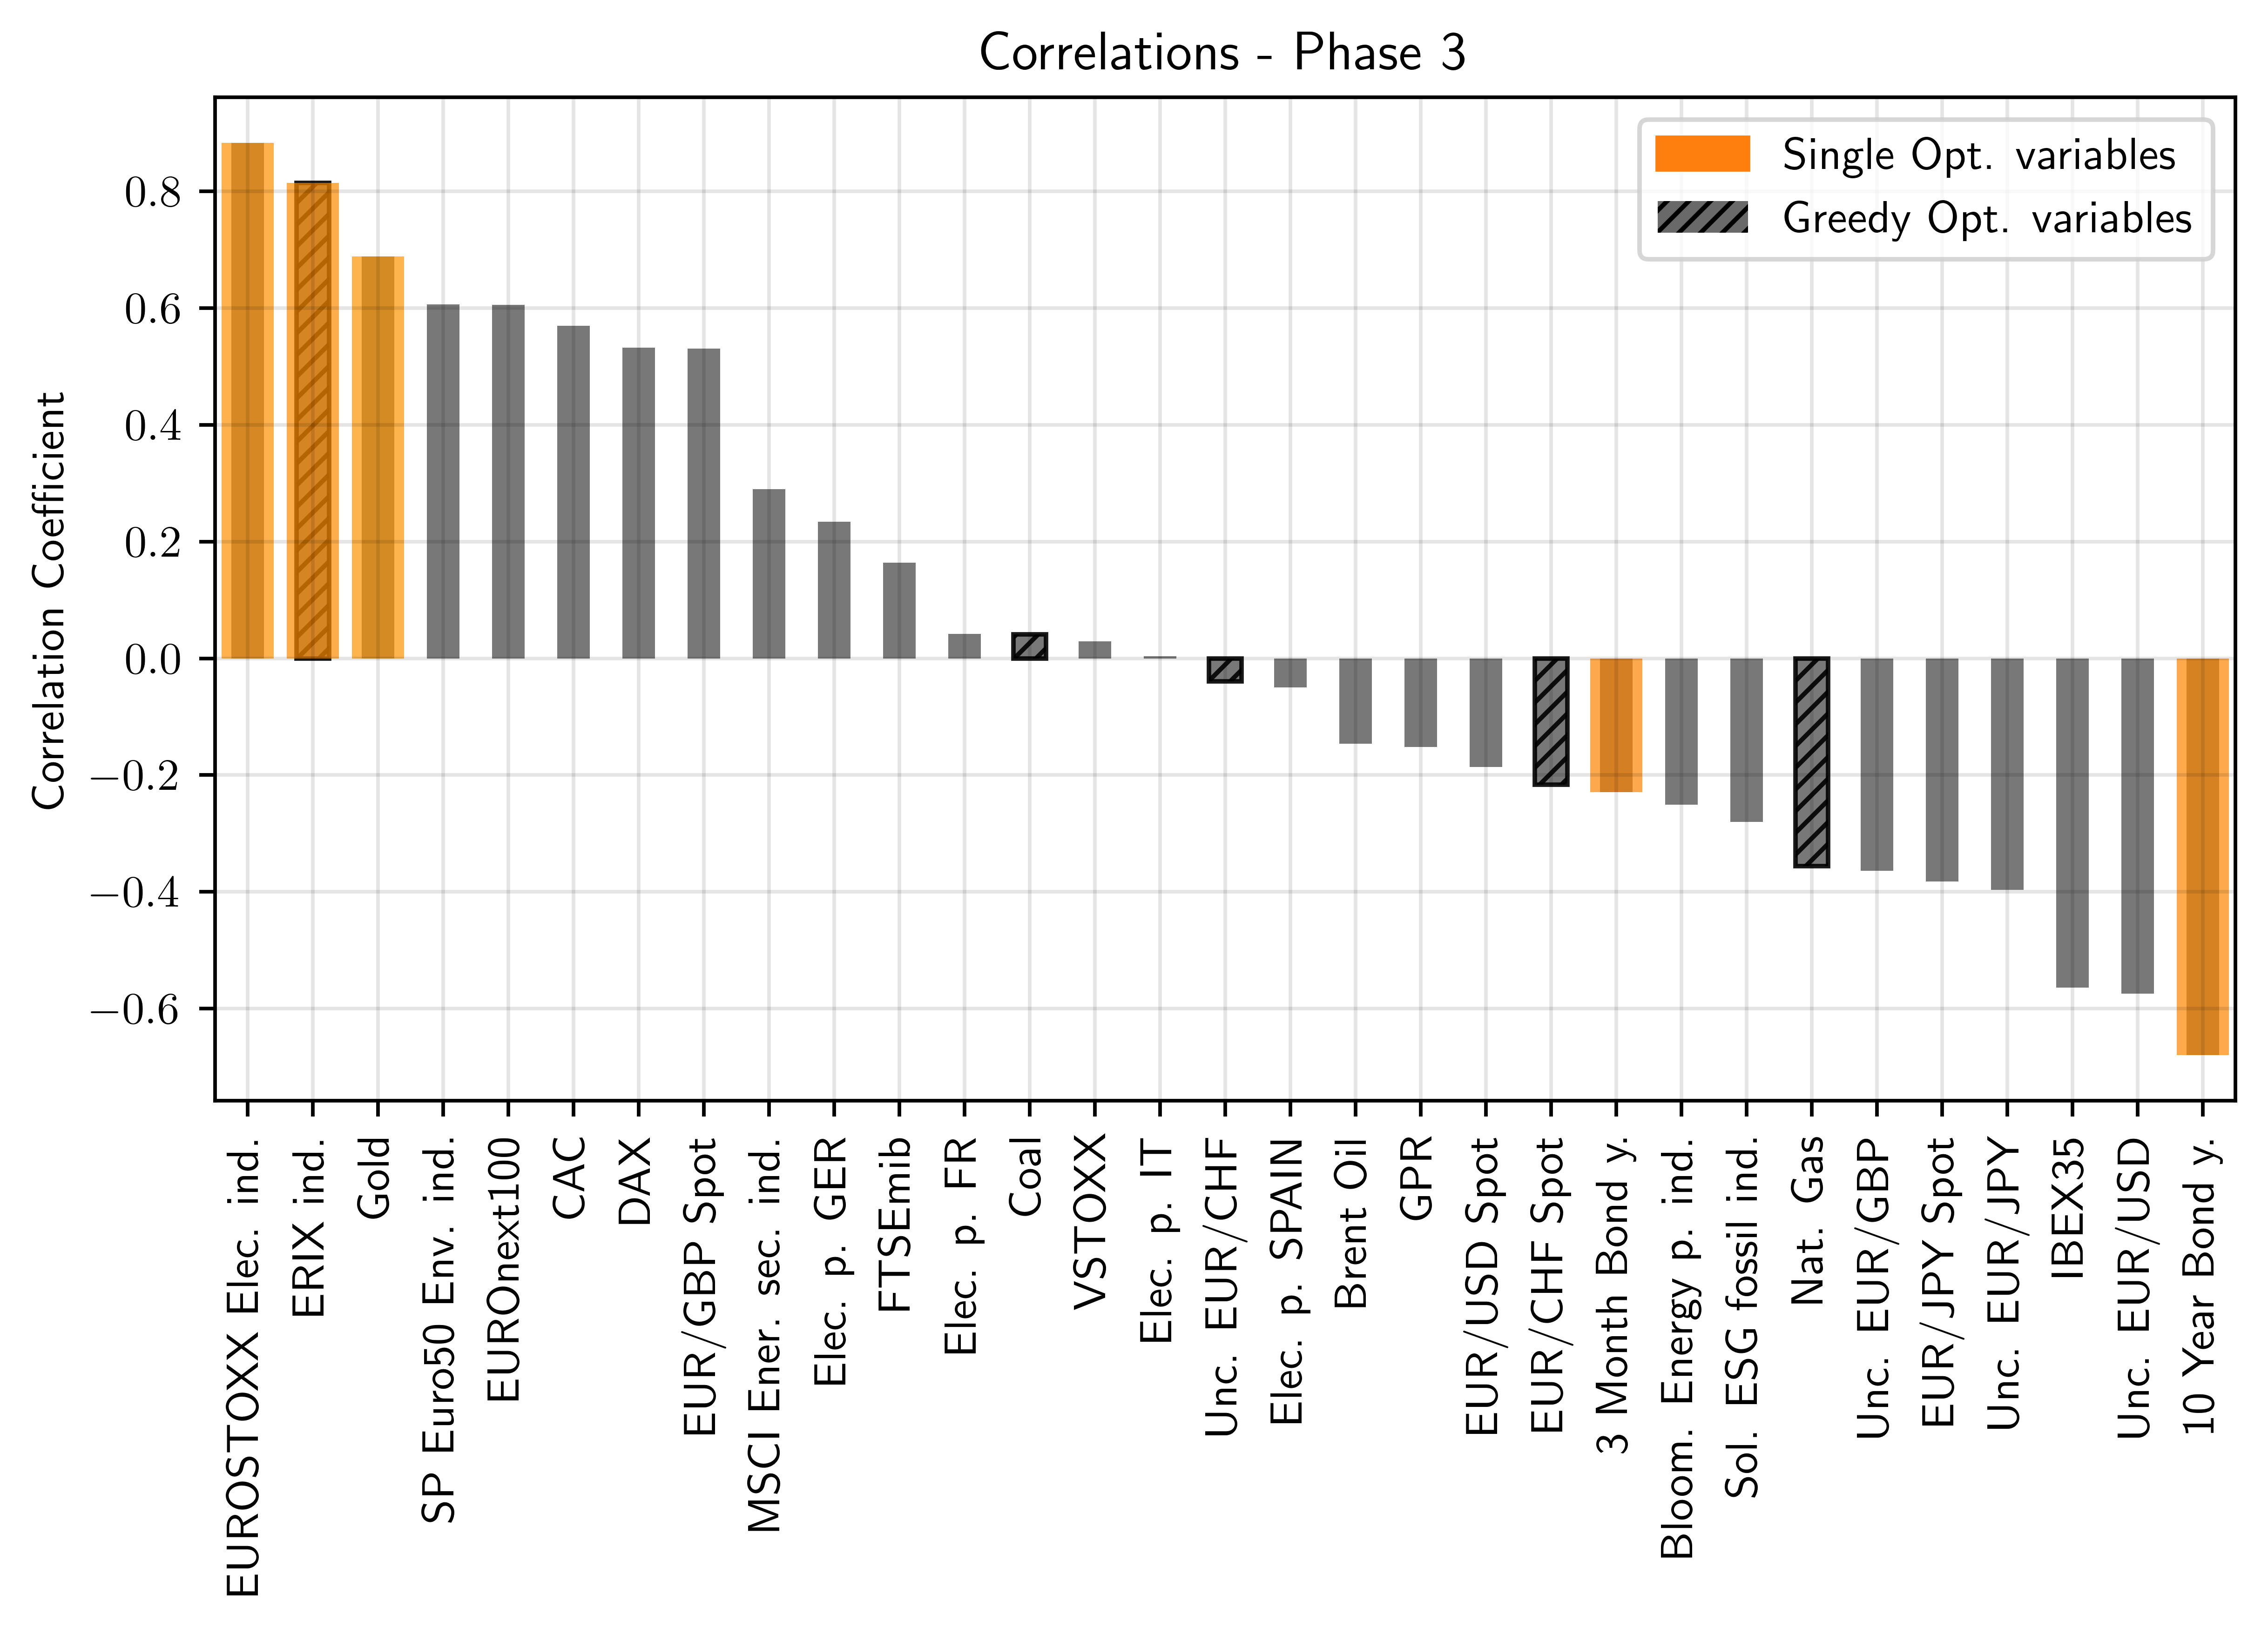

In [12]:
fig, ax = plt.subplots(figsize=(4,4), dpi = 700)
correlations_3.plot(kind='bar', color='dimgrey' , alpha=0.9, figsize=(8, 4))
plt.bar(1, correlations_3[1], color=color1_3, alpha=0.7)
plt.bar(0, correlations_3[0], color=color1_4, alpha=0.7)
plt.bar(30, correlations_3[30], color=color1_2, alpha=0.7)
plt.bar(21, correlations_3[21], color=color1_1, alpha=0.7)
plt.bar(2, correlations_3[2], color=color1_5, alpha=0.7)
plt.ylabel('Correlation Coefficient')
plt.grid(axis='both',color="black", alpha=.1)
plt.title('Correlations - Phase 3')
ax = plt.gca()
ax.patches[1].set_hatch('/////')
ax.patches[12].set_hatch('/////')
ax.patches[24].set_hatch('/////')
ax.patches[15].set_hatch('/////')
ax.patches[20].set_hatch('/////')
ax.patches[1].set_edgecolor('k')
ax.patches[12].set_edgecolor('k')
ax.patches[24].set_edgecolor('k')
ax.patches[15].set_edgecolor('k')
ax.patches[20].set_edgecolor('k')
orange_patch = mpatches.Patch(color='tab:orange', label='Single Opt. variables')
dotted_patch = mpatches.Patch(facecolor='dimgrey', hatch='/////', label='Greedy Opt. variables')
plt.legend(handles=[orange_patch, dotted_patch])
fig.savefig('../Figures/Fig4_1_Correlations_Phase3.png', dpi=700, bbox_inches='tight')

In [13]:
X_4 = df_.iloc[1782:,]
correlations_4 = X_4.corrwith(df_["EUA"])
correlations_4 = correlations_4.sort_values(ascending=False)
correlations_4 = correlations_4[1:]

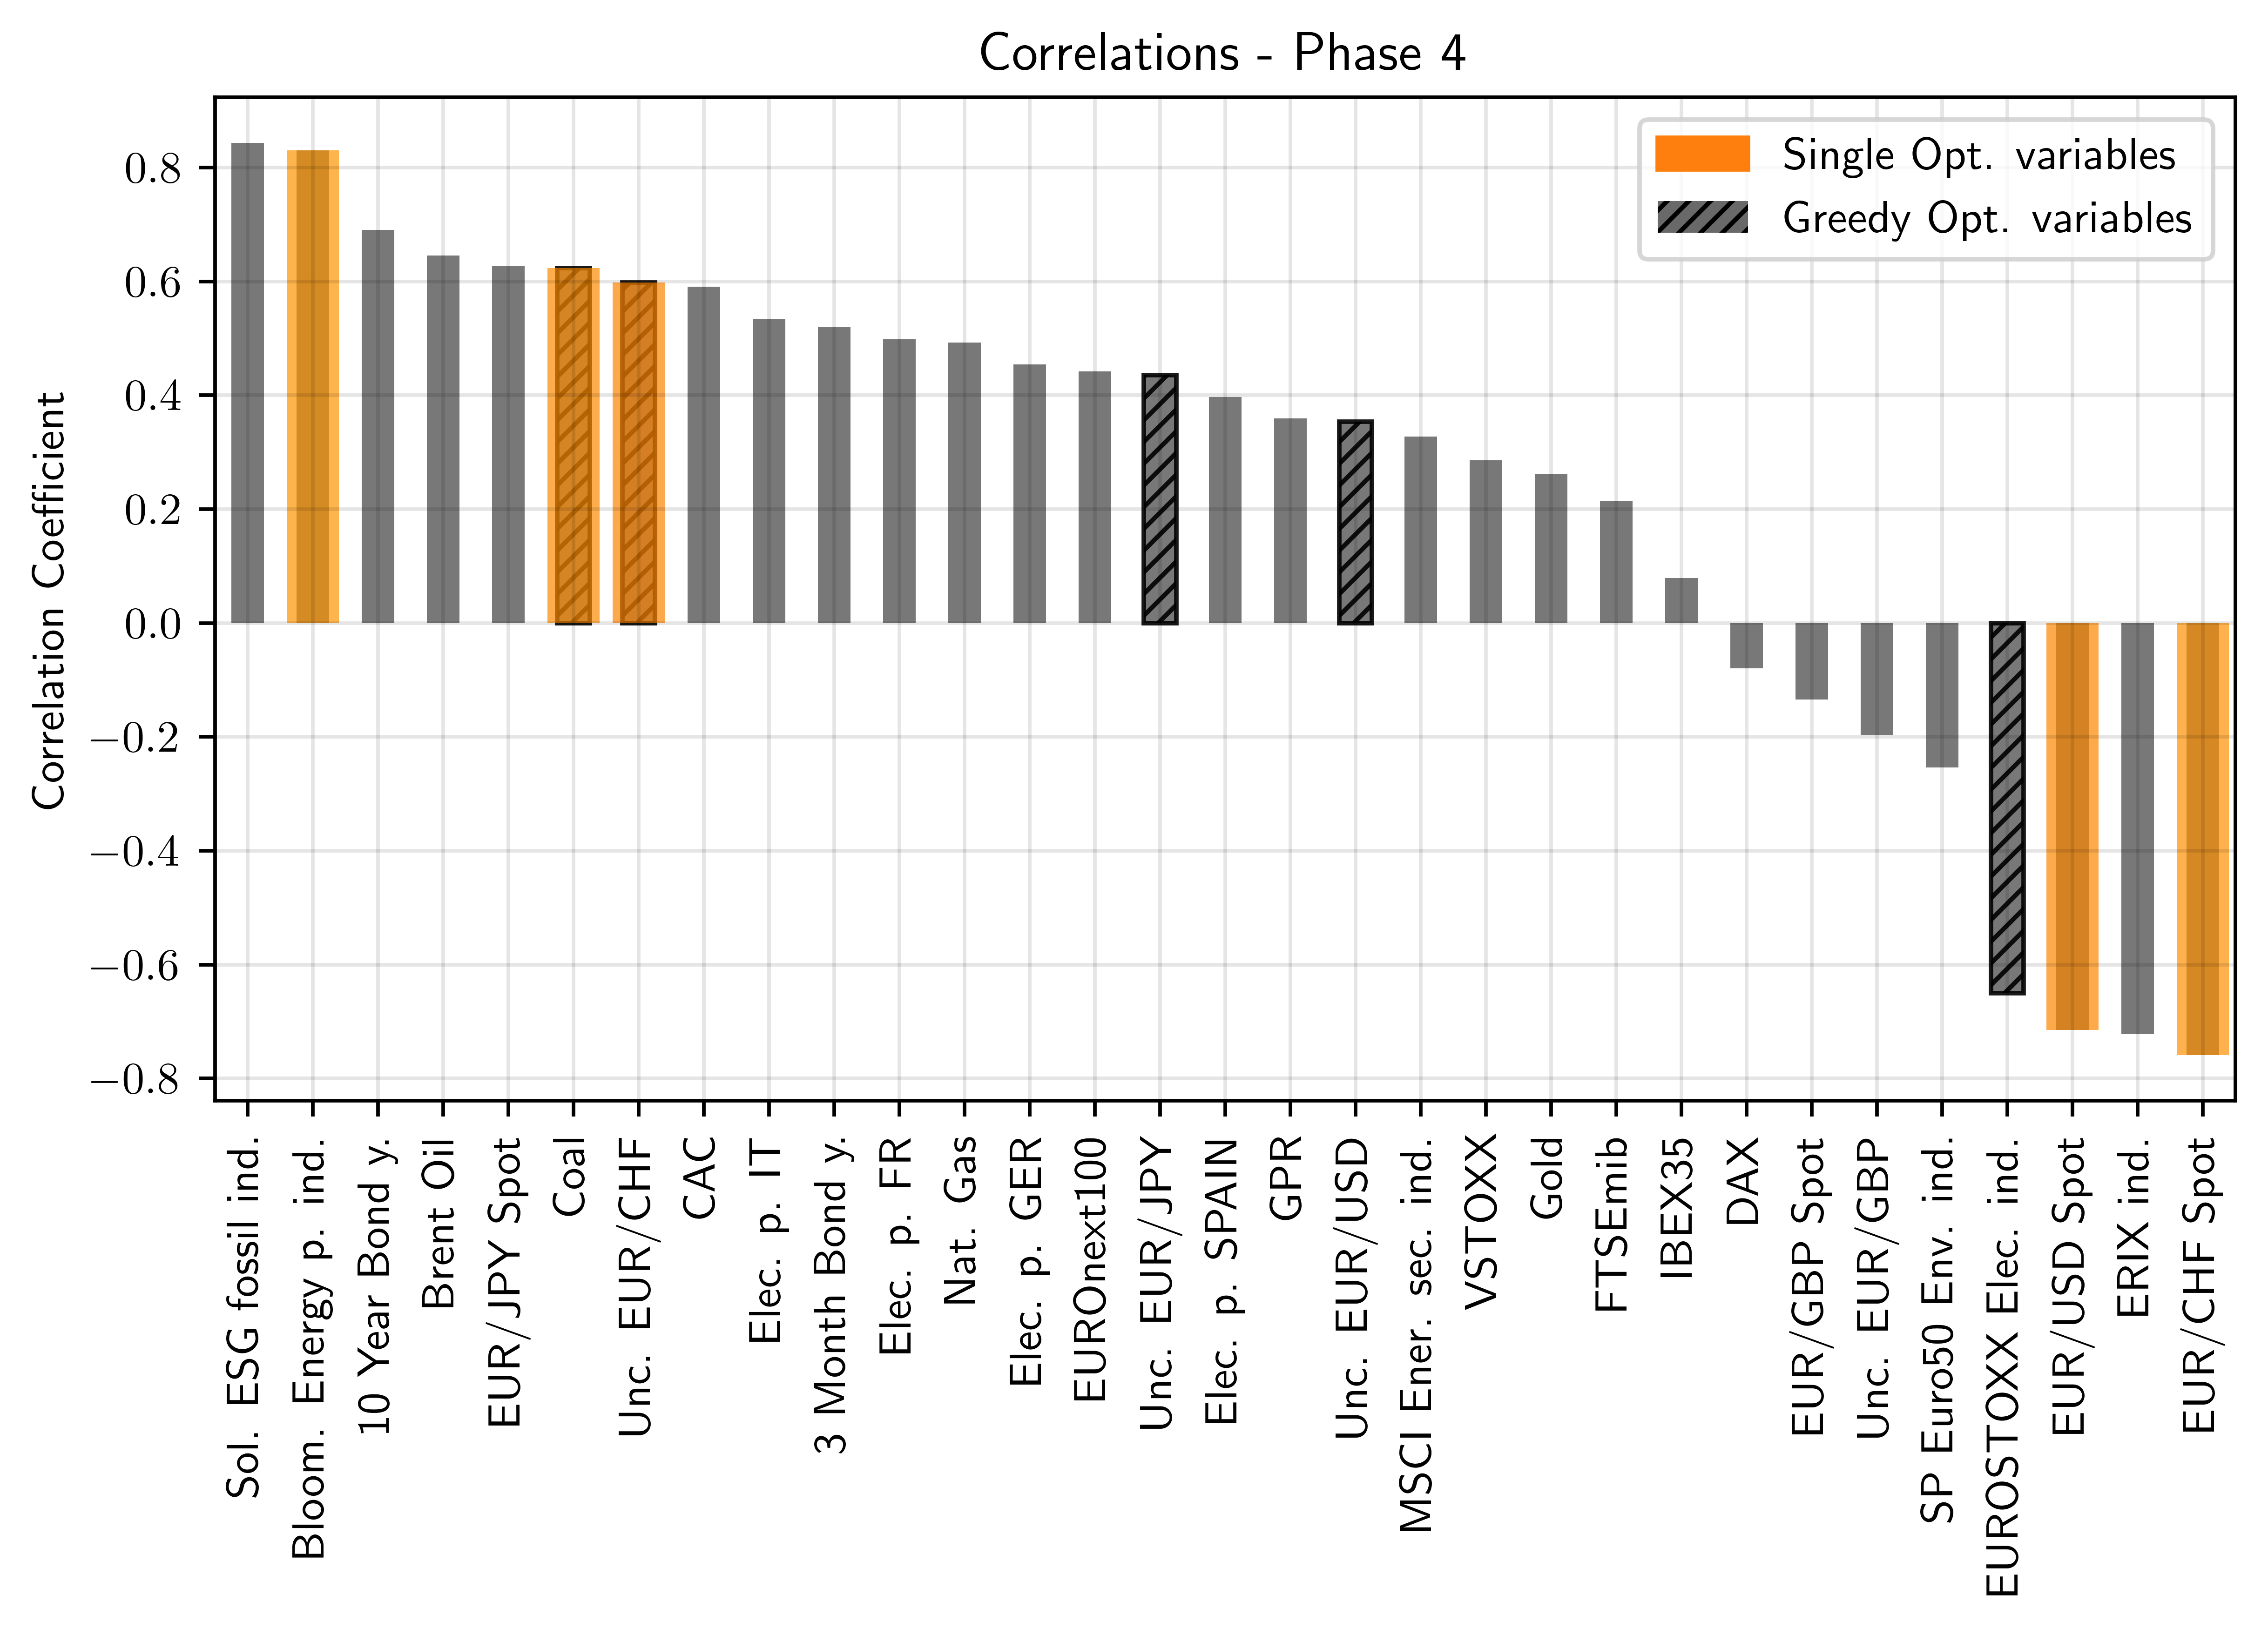

In [14]:
plt.figure(figsize=(4,4), dpi = 700)
correlations_4.plot(kind='bar', color='dimgrey' , alpha=0.9, figsize=(8, 4))
plt.bar(6, correlations_4[6], color=color1_1, alpha=0.7)
plt.bar(28, correlations_4[28], color=color1_2, alpha=0.7)
plt.bar(5, correlations_4[5], color=color1_3, alpha=0.7)
plt.bar(30, correlations_4[30], color=color1_4, alpha=0.7)
plt.bar(1, correlations_4[1], color=color1_5, alpha=0.7)
plt.ylabel('Correlation Coefficient')
plt.grid(axis='both',color="black", alpha=.1)
plt.title('Correlations - Phase 4')
ax = plt.gca()
ax.patches[6].set_hatch('/////')
ax.patches[17].set_hatch('/////')
ax.patches[5].set_hatch('/////')
ax.patches[14].set_hatch('/////')
ax.patches[27].set_hatch('/////')
ax.patches[6].set_edgecolor('k')
ax.patches[17].set_edgecolor('k')
ax.patches[5].set_edgecolor('k')
ax.patches[14].set_edgecolor('k')
ax.patches[27].set_edgecolor('k')
orange_patch = mpatches.Patch(color='tab:orange', label='Single Opt. variables')
dotted_patch = mpatches.Patch(facecolor='dimgrey', hatch='/////', label='Greedy Opt. variables')
plt.legend(handles=[orange_patch, dotted_patch])
plt.savefig('../Figures/Fig4_2_Correlations_Phase4.png', dpi=700, bbox_inches='tight')

Figure 4: Correlation analysis. In this plot we present the correlations among the raw daily data towards EUA. The most informative single variables (Fig. 5) are highlighted in shades of orange. The dashed bars refers to the first 5 most informative variables obtain through a greedy selection algorithm (Fig. 6), for Phase 3 and Phase 4.

***

## 4.2 - Information Imbalance analysis

In [15]:
%reset -f

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dadapy import Data
from sklearn.preprocessing import StandardScaler
from dadapy import DataSets as ds
from utils_zero_dist_imbalance import _get_imbalance_from_d1_to_d2, _get_average_imbalance_from_d1_to_d2
from scipy.spatial.distance import pdist, squareform

plt.rcParams['text.usetex'] = True

In [17]:
NUM_COLORS1 = 31
cm_1 = plt.get_cmap('Wistia')
colors1 = [cm_1(1.*i/NUM_COLORS1) for i in range(NUM_COLORS1)]
colors1_test = np.array(colors1)
colors1_test = colors1_test[::-1]

In [18]:
df = pd.read_excel('../Data/Dataset_eua_IMv4.3.xlsx')

In [19]:
labels = np.array(['GPR', 'VSTOXX', 'Unc. EUR/USD', 'Unc. EUR/JPY', 'Unc. EUR/GBP', 'Unc. EUR/CHF',
       'Nat. Gas', 'Elec. p. SPAIN', 'Elec. p. GER', 'Elec. p. IT',
       'Elec. p. FR', 'Brent Oil', 'Coal', 'Gold', 'EUR/USD Spot',
       'EUR/JPY Spot', 'EUR/GBP Spot', 'EUR/CHF Spot',
       'Bloom. Energy p. ind.', 'Sol. ESG fossil ind.',
       'SP Euro50 Env. ind.', 'MSCI Ener. sec. ind.', 'ERIX ind.', 'EUROnext100', 'IBEX35', 'DAX',
       'CAC', 'FTSEmib', 'EUROSTOXX Elect. ind.', '10 Year Bond y.', '3 Month Bond y.'])

In [20]:
y = df['eua_last']
y = y.values
y = y.reshape(-1,1)
X = df.iloc[:,3:]
X = X.values
scaler = StandardScaler()
y = scaler.fit_transform(y)
X = scaler.fit_transform(X)

In [21]:
X_3 = X[:1782, :]
y_3 = y[:1782, :]

In [22]:
d_y_3 = Data(y_3, maxk=y_3.shape[0]-1)
d_y_3.compute_distances()

d_X_3 = Data(X_3, maxk=X_3.shape[0]-1)
d_X_3.compute_distances()

d_y3_dist_matrix = squareform(pdist(y_3, 'euclidean'))

imbalance_old = _get_imbalance_from_d1_to_d2(d_X_3, d_y_3)
imbalance_new =_get_imbalance_from_d1_to_d2(d_y_3, d_X_3)
imbalance_average_X_to_y = _get_average_imbalance_from_d1_to_d2(d_X_3, d_y3_dist_matrix)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


In [23]:
inf_imb_X_to_y = []
inf_imb_X_to_y_average = []

for i in range(X_3.shape[1]):
    print(i)
    d_3_i = Data(X_3[:, [i]], maxk=X_3.shape[0]-1)
    d_3_i.compute_distances()
    inf_imb_X_to_y.append(_get_imbalance_from_d1_to_d2(d_3_i, d_y_3))
    inf_imb_X_to_y_average.append(_get_average_imbalance_from_d1_to_d2(d_3_i, d_y3_dist_matrix))

0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


2


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


6


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


7


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


8


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


9


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


11


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


12


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


13


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


14


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


15


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


16


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


17


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


18


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


19


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


21


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


22


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


23


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


24


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


25


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


26


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


27


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


28


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


29


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


30


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


In [24]:
inf_imb_y_to_X = []
inf_imb_y_to_X_average = []

for i in range(X_3.shape[1]):
    print(i)
    X_3_i = X_3[:, [i]]
    d_x_3_i = squareform(pdist(X_3_i, 'euclidean'))
    d_3 = Data(y_3, maxk=y_3.shape[0]-1)
    d_3.compute_distances()
    inf_imb_y_to_X.append(_get_imbalance_from_d1_to_d2(d_3, d_X_3))
    inf_imb_y_to_X_average.append(_get_average_imbalance_from_d1_to_d2(d_3, d_x_3_i))

0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


1


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


2


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


3


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


4


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


6


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


7


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


8


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


9


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


11


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


12


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


13


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


14


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


15


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


16


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


17


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


18


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


19


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


21


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


22


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


23


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


24


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


25


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


26


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


27


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


28


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


29


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


30


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(


In [25]:
sort_idx = np.argsort(inf_imb_X_to_y_average)
inf_imb_X_to_y_average = np.array(inf_imb_X_to_y_average)[sort_idx]
inf_imb_X_to_y = np.array(inf_imb_X_to_y)[sort_idx]
labels = labels[sort_idx]
inf_imb_y_to_X_average = np.array(inf_imb_y_to_X_average)[sort_idx]
inf_imb_y_to_X = np.array(inf_imb_y_to_X)[sort_idx]


In [26]:
enumeration = np.arange(1, len(inf_imb_X_to_y_average)+1)
single_imbs = np.zeros((31,2))
single_imbs[:,0] = inf_imb_X_to_y_average
single_imbs[:,1] = inf_imb_y_to_X_average

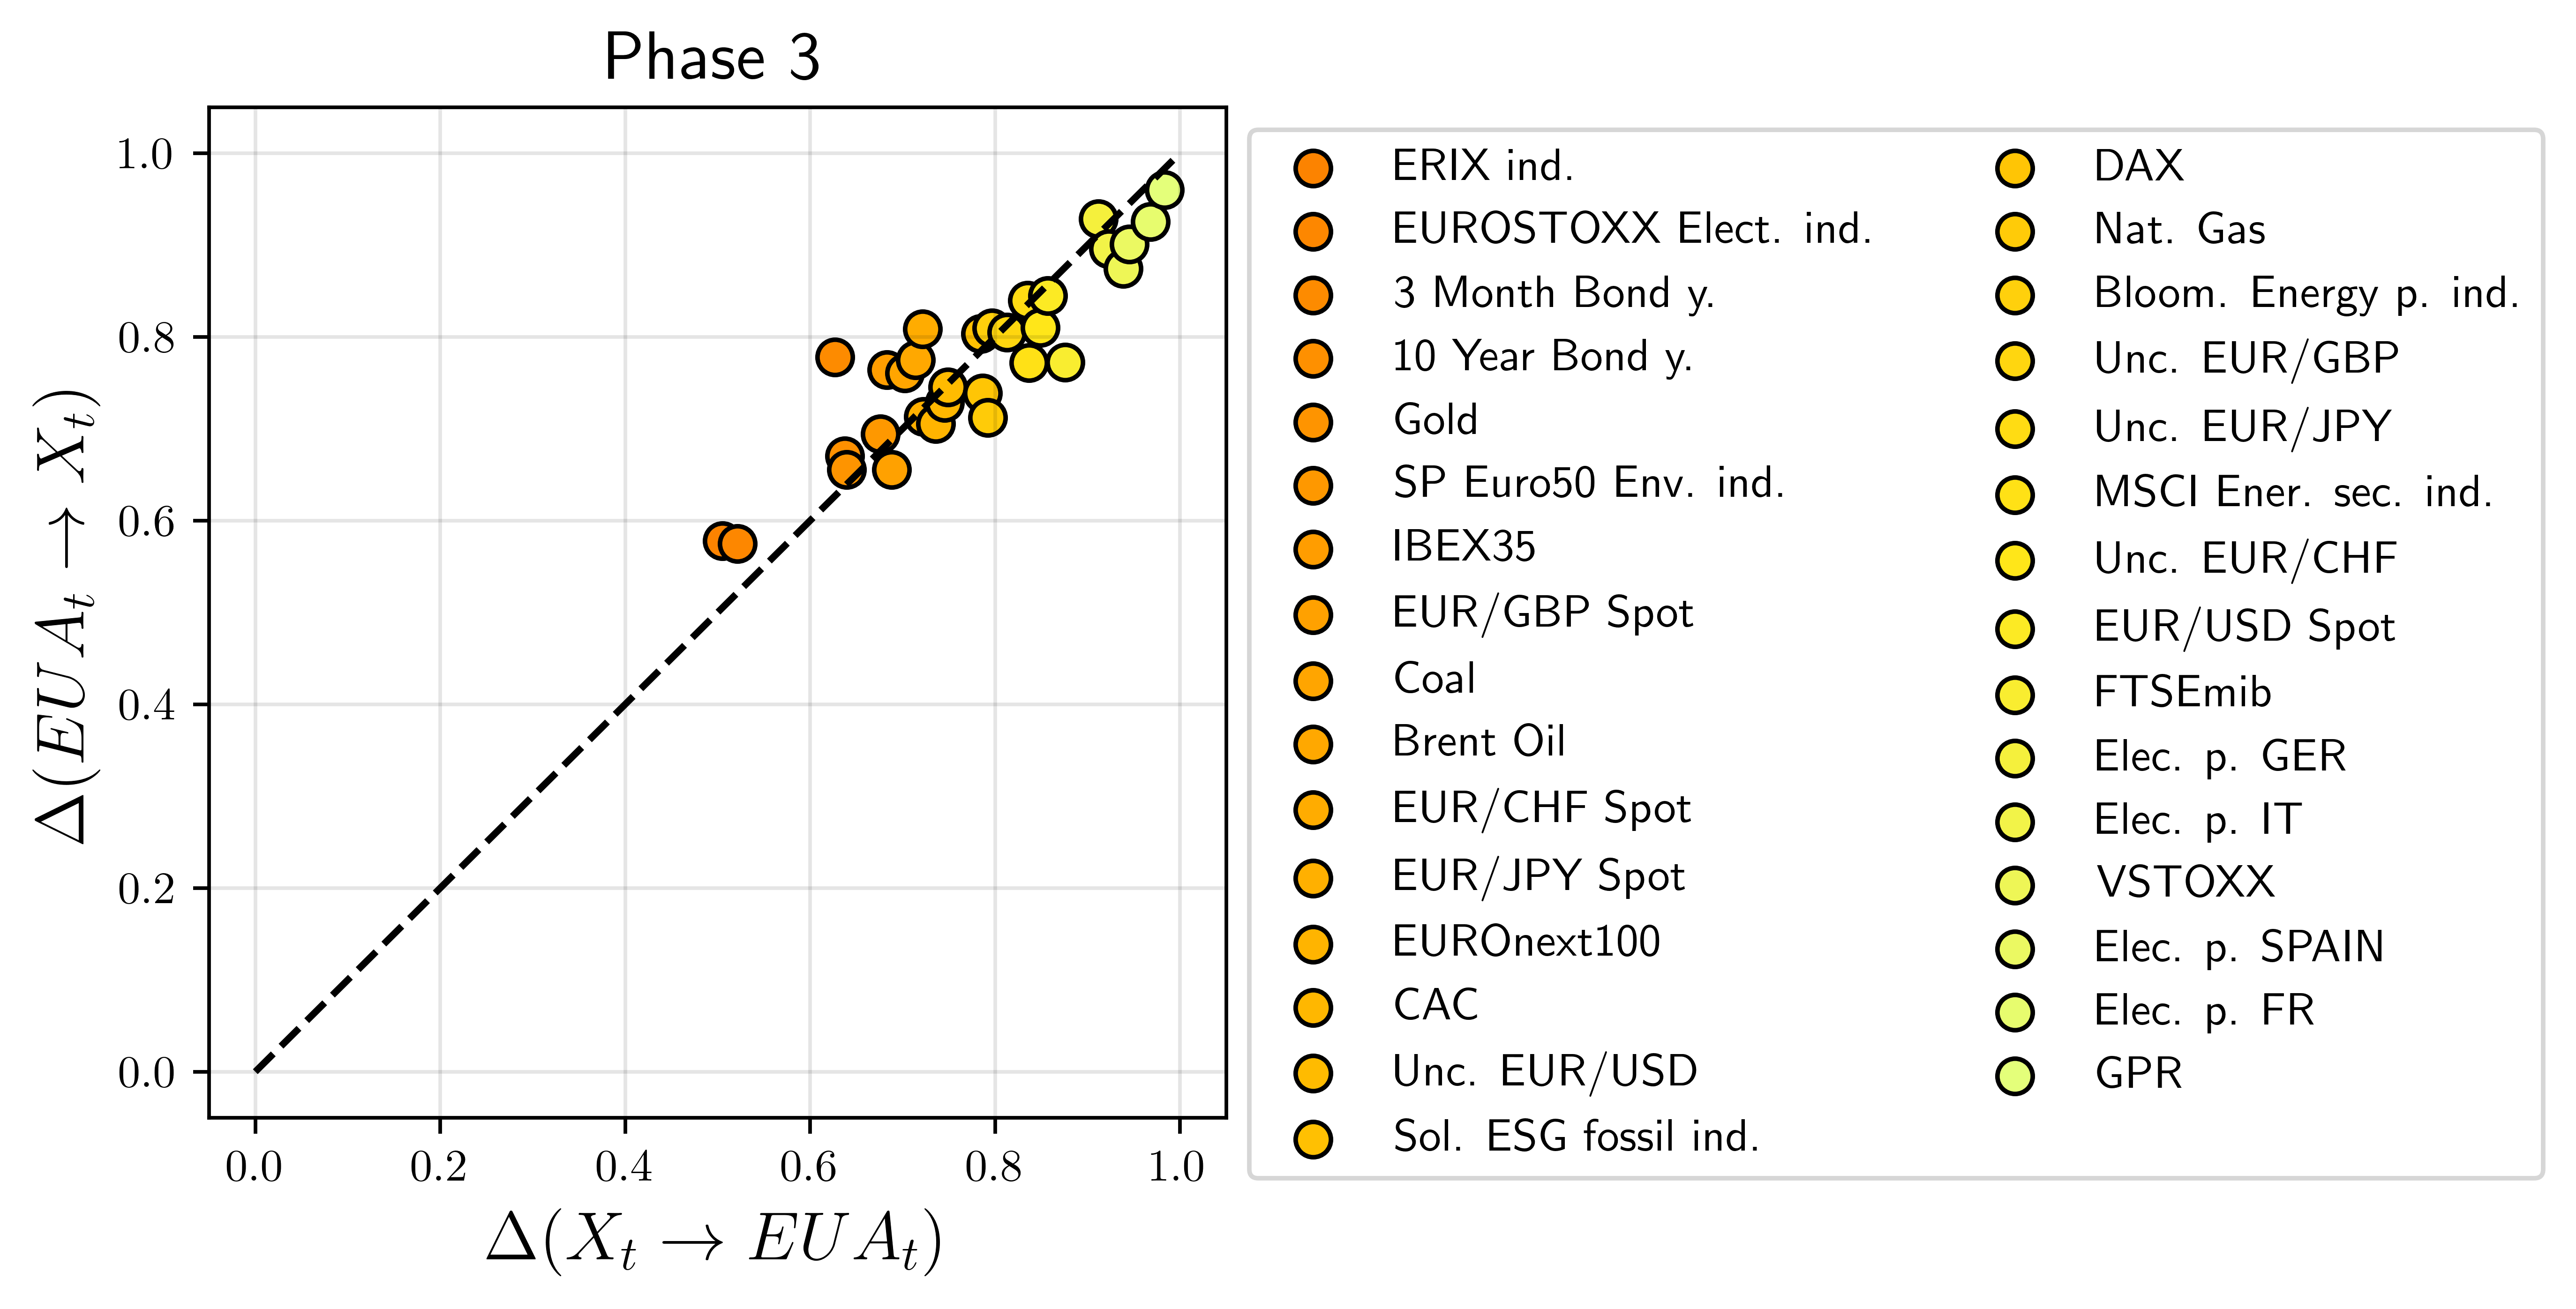

In [27]:
fig, ax = plt.subplots(figsize=(4,4), dpi = 700)
ax.set_facecolor("white")
for i, imbs in enumerate(single_imbs):
    plt.scatter(imbs[0], imbs[1], color = colors1_test[i], s=60, edgecolor ='k', label = labels[i])
plt.plot([0, 1], 'k--')
plt.legend(ncol = 2, bbox_to_anchor=(1.0, 1.))
plt.xlabel(r'$\Delta(X_{t} \rightarrow EUA_{t})$', fontsize=15)
plt.ylabel(r'$\Delta(EUA_{t}\rightarrow X_{t})$', fontsize=15)
plt.title('Phase 3', fontsize=15)
plt.grid(axis='both',color="black", alpha=.1)
fig.savefig('../Figures/Fig5_1_Imbalance_Phase3.png', dpi=700, bbox_inches='tight')

In [28]:
%reset -f

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dadapy import Data
from sklearn.preprocessing import StandardScaler
from dadapy import DataSets as ds
from utils_zero_dist_imbalance import _get_imbalance_from_d1_to_d2, _get_average_imbalance_from_d1_to_d2
from scipy.spatial.distance import pdist, squareform

plt.rcParams['text.usetex'] = True

In [30]:
NUM_COLORS1 = 31
cm_1 = plt.get_cmap('Wistia')
colors1 = [cm_1(1.*i/NUM_COLORS1) for i in range(NUM_COLORS1)]
colors1_test = np.array(colors1)
colors1_test = colors1_test[::-1]

In [31]:
df = pd.read_excel('../Data/Dataset_eua_IMv4.3.xlsx')

y = df['eua_last']
y = y.values
y = y.reshape(-1,1)

X = df.iloc[:,3:]
X = X.values

scaler = StandardScaler()
y = scaler.fit_transform(y)
X = scaler.fit_transform(X)

In [32]:
labels = np.array(['GPR', 'VSTOXX', 'Unc. EUR/USD', 'Unc. EUR/JPY', 'Unc. EUR/GBP', 'Unc. EUR/CHF',
       'Nat. Gas', 'Elec. p. SPAIN', 'Elec. p. GER', 'Elec. p. IT',
       'Elec. p. FR', 'Brent Oil', 'Coal', 'Gold', 'EUR/USD Spot',
       'EUR/JPY Spot', 'EUR/GBP Spot', 'EUR/CHF Spot',
       'Bloom. Energy p. ind.', 'Sol. ESG fossil ind.',
       'SP Euro50 Env. ind.', 'MSCI Ener. sec. ind.', 'ERIX ind.', 'EUROnext100', 'IBEX35', 'DAX',
       'CAC', 'FTSEmib', 'EUROSTOXX Elect. ind.', '10 Year Bond y.', '3 Month Bond y.'])

In [33]:
X_3 = X[1782:,:]
y_3 = y[1782:,:]

In [34]:
d_y_3 = Data(y_3, maxk=y_3.shape[0]-1)
d_y_3.compute_distances()

d_X_3 = Data(X_3, maxk=X_3.shape[0]-1)
d_X_3.compute_distances()

d_y3_dist_matrix = squareform(pdist(y_3, 'euclidean'))

imbalance_old = _get_imbalance_from_d1_to_d2(d_X_3, d_y_3)
imbalance_new =_get_imbalance_from_d1_to_d2(d_y_3, d_X_3)
imbalance_average_X_to_y = _get_average_imbalance_from_d1_to_d2(d_X_3, d_y3_dist_matrix)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


In [35]:
inf_imb_X_to_y = []
inf_imb_X_to_y_average = []

for i in range(X_3.shape[1]):
    d_3_i = Data(X_3[:, [i]], maxk=X_3.shape[0]-1)
    d_3_i.compute_distances()
    inf_imb_X_to_y.append(_get_imbalance_from_d1_to_d2(d_3_i, d_y_3))
    inf_imb_X_to_y_average.append(_get_average_imbalance_from_d1_to_d2(d_3_i, d_y3_dist_matrix))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbour

In [36]:
inf_imb_y_to_X = []
inf_imb_y_to_X_average = []

for i in range(X_3.shape[1]):
    X_3_i = X_3[:, [i]]
    d_x_3_i = squareform(pdist(X_3_i, 'euclidean'))
    d_3 = Data(y_3, maxk=y_3.shape[0]-1)
    d_3.compute_distances()
    inf_imb_y_to_X.append(_get_imbalance_from_d1_to_d2(d_3, d_X_3))
    inf_imb_y_to_X_average.append(_get_average_imbalance_from_d1_to_d2(d_3, d_x_3_i))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbours at 0 distance, meaning the dataset probably has identical points.
This can cause problems in various routines.
We suggest to either perform smearing of distances using
remove_zero_dists()
or remove identical points using
remove_identical_points()).
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/_utils/utils.py:151: UserWarning: There are points with neighbour

In [37]:
sort_idx = np.argsort(inf_imb_X_to_y_average)
inf_imb_X_to_y_average = np.array(inf_imb_X_to_y_average)[sort_idx]
inf_imb_X_to_y = np.array(inf_imb_X_to_y)[sort_idx]
labels = labels[sort_idx]
inf_imb_y_to_X_average = np.array(inf_imb_y_to_X_average)[sort_idx]
inf_imb_y_to_X = np.array(inf_imb_y_to_X)[sort_idx]


In [38]:
enumeration = np.arange(1, len(inf_imb_X_to_y_average)+1)
single_imbs = np.zeros((31,2))
single_imbs[:,0] = inf_imb_X_to_y_average
single_imbs[:,1] = inf_imb_y_to_X_average

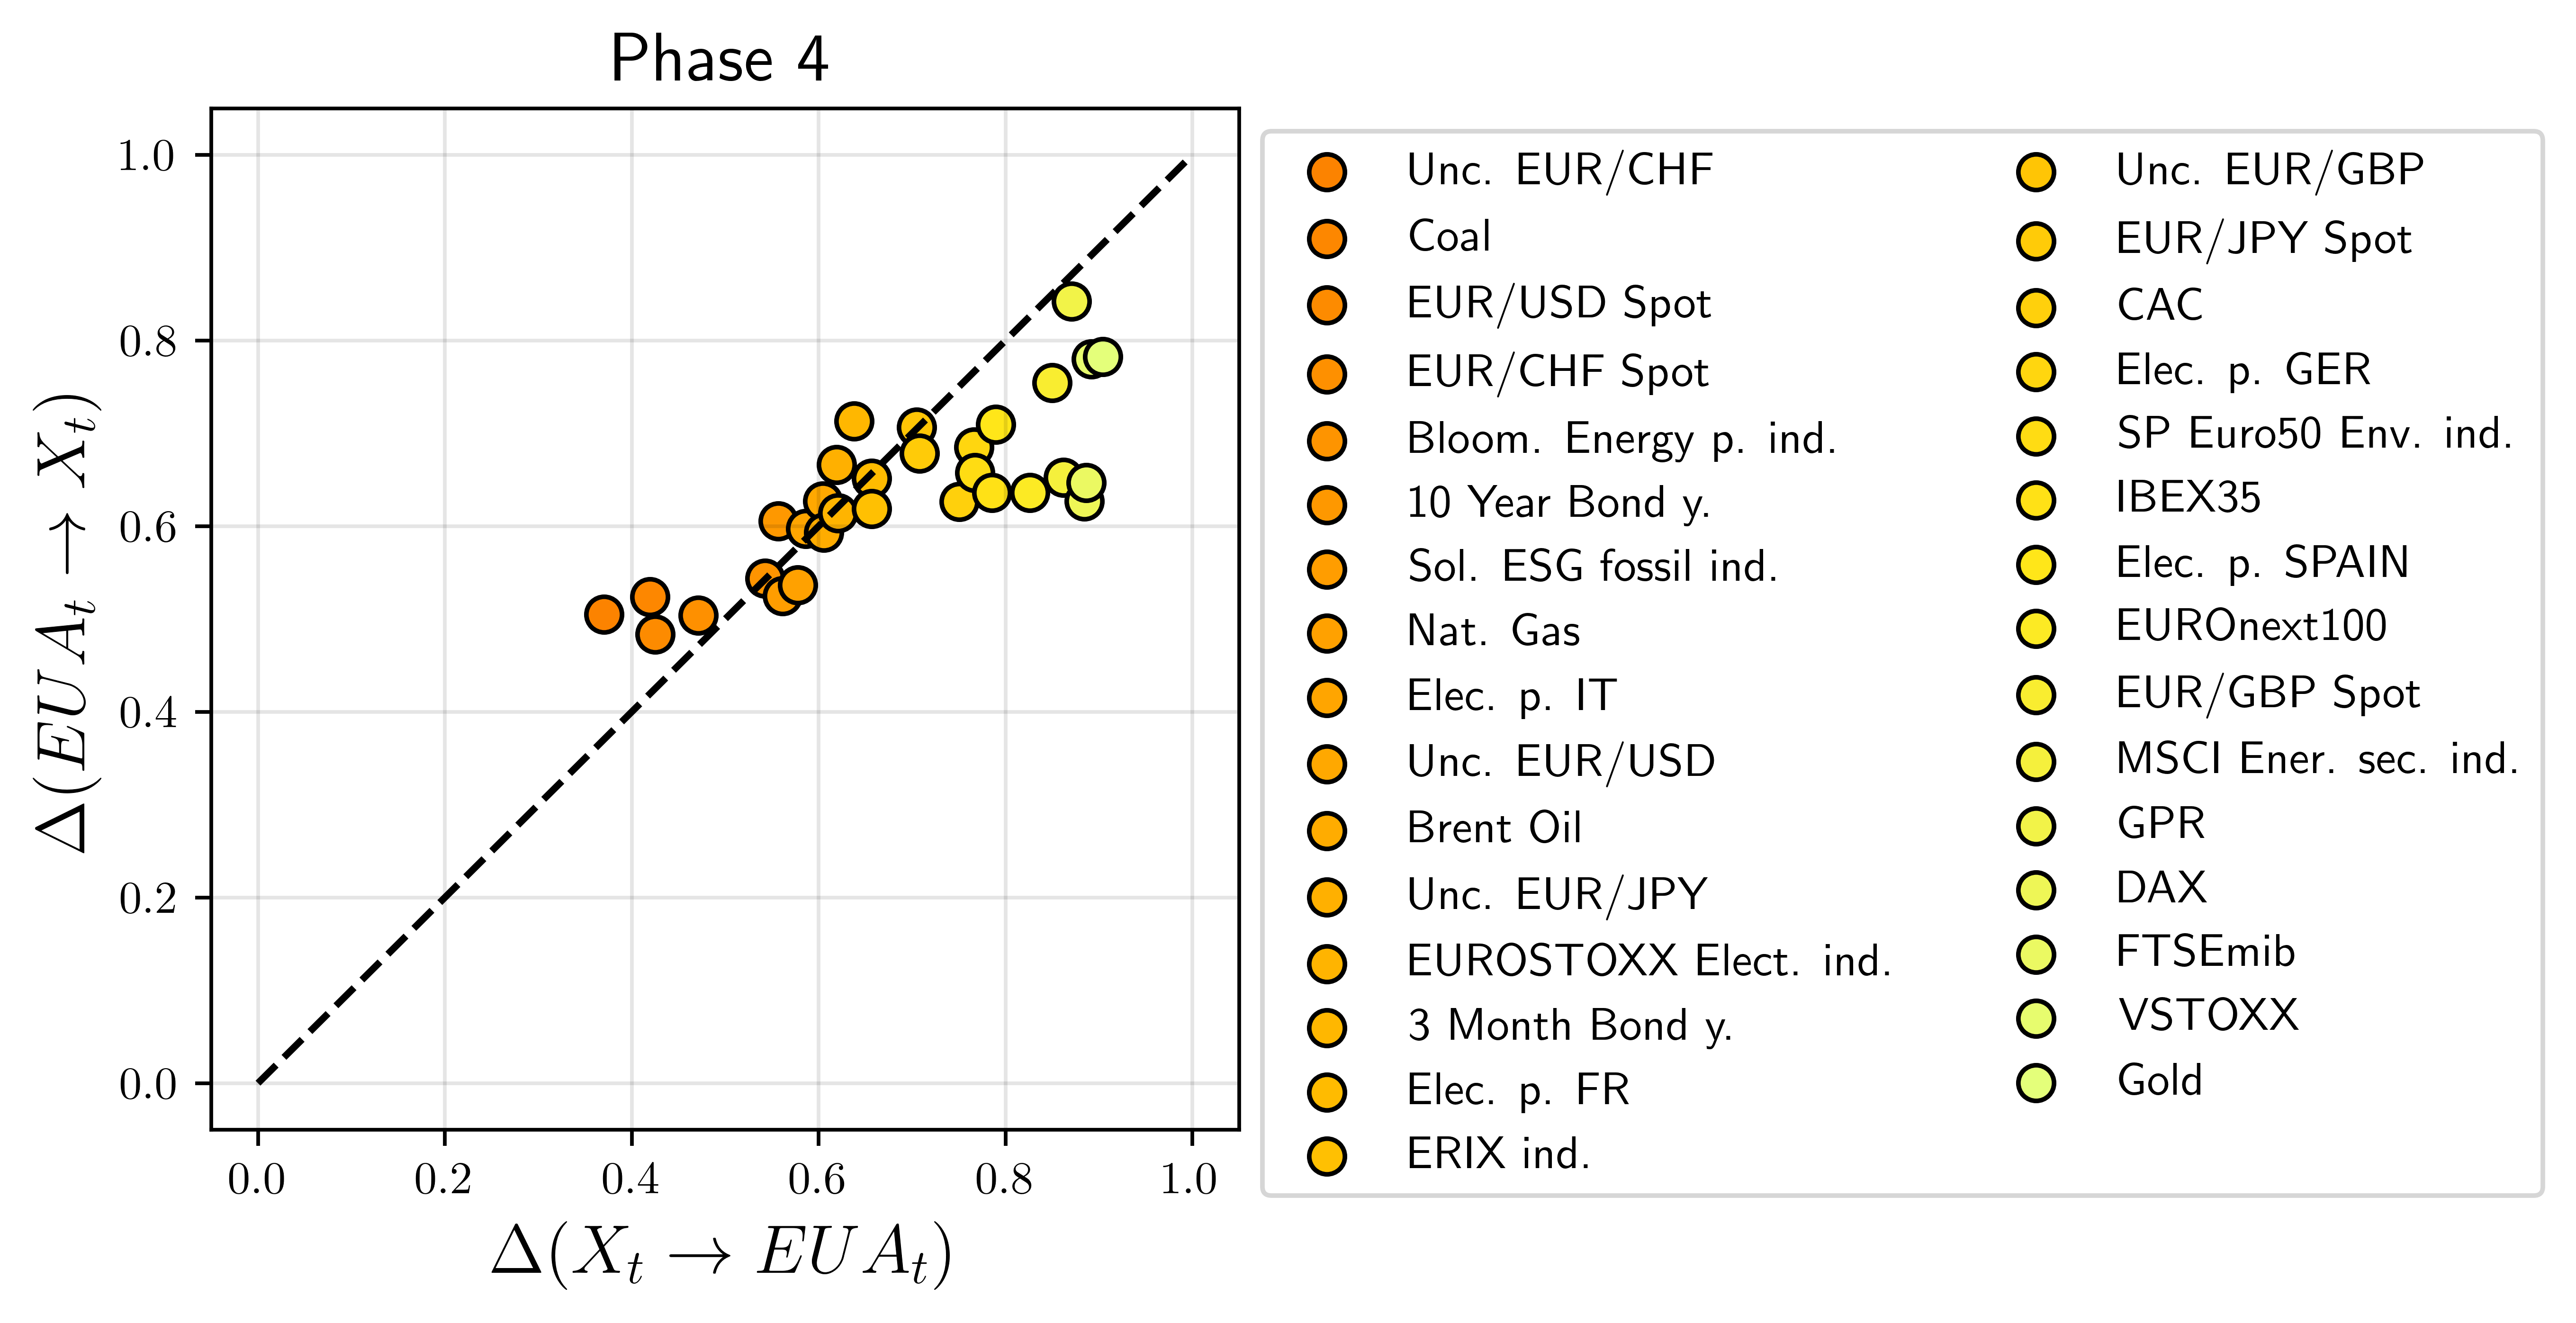

In [39]:
fig, ax = plt.subplots(figsize=(4,4), dpi = 700)
ax.set_facecolor("white")
for i, imbs in enumerate(single_imbs):
    plt.scatter(imbs[0], imbs[1], color = colors1_test[i], s=60, edgecolor ='k', label = labels[i])
plt.plot([0, 1], 'k--')
plt.legend(ncol = 2, bbox_to_anchor=(1.0, 1.))
plt.xlabel(r'$\Delta(X_{t} \rightarrow EUA_{t})$', fontsize=15)
plt.ylabel(r'$\Delta(EUA_{t}\rightarrow X_{t})$', fontsize=15)
plt.title('Phase 4', fontsize=15)
plt.grid(axis='both',color="black", alpha=.1)
fig.savefig('../Figures/Fig5_2_Imbalance_Phase4.png', dpi=700, bbox_inches='tight')

Figure 5: Daily Information Imbalance analysis. This plot analyses the information content of each variable in our dataset taken individually. The legend is order
from the most informative (darker orange) to the less informative variables (yellow orange), for Phase 3 and Phase 4.

***

## Greedy optimisation results

In [40]:
%reset -f

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dadapy import Data
from sklearn.preprocessing import StandardScaler

plt.rcParams['text.usetex'] = True

In [42]:
NUM_COLORS2 = 10
cm_2 = plt.get_cmap('Set3')
colors2 = [cm_2(1.*i/NUM_COLORS2) for i in range(NUM_COLORS2)]

In [43]:
# Import the dataset from the excel file
df = pd.read_excel('../Data/Dataset_eua_IMv4.3.xlsx')

In [44]:

eua = df['eua_last']
eua = eua.values
eua = eua.reshape(-1,1)
X = df.iloc[:,3:]
X = X.values 

In [45]:
scaler = StandardScaler()
eua = scaler.fit_transform(eua)
X = scaler.fit_transform(X)

In [46]:
X_labels = np.array(['GPR', 'VSTOXX', 'Unc. EUR/USD', 'Unc. EUR/JPY', 'Unc. EUR/GBP', 'Unc. EUR/CHF',
       'Nat. Gas', 'Elec. p. SPAIN', 'Elec. p. GER', 'Elec. p. IT',
       'Elec. p. FR', 'Brent Oil', 'Coal', 'Gold', 'EUR/USD Spot',
       'EUR/JPY Spot', 'EUR/GBP Spot', 'EUR/CHF Spot',
       'Bloom. Energy p. ind.', 'Sol. ESG fossil ind.',
       'SP Euro50 Env. ind.', 'MSCI Ener. sec. ind.', 'ERIX ind.', 'EUROnext100', 'IBEX35', 'DAX',
       'CAC', 'FTSEmib', 'EUROSTOXX Elect. ind.', '10 Year Bond y.', '3 Month Bond y.'])

In [47]:
eua_p3 = eua[0:1782]
X_p3 = X[0:1782,:]

d_t_p3 = Data(eua_p3+np.random.normal(0, 1e-3, size=eua_p3.shape), maxk = eua_p3.shape[0]-1)
d_t_p3.compute_distances()

d_X_phase_3 = Data(X_p3+np.random.normal(0, 1e-3, size=X_p3.shape), maxk = X_p3.shape[0]-1 )
d_X_phase_3.compute_distances()

best_sets_p3, best_imbs_p3, all_imbs_p3 = d_X_phase_3.greedy_feature_selection_target(target_ranks = d_t_p3.dist_indices, 
                                          n_coords=10, 
                                          k = 1, n_best=1, symm = False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  31
total number of computations is:  30
total number of computations is:  29
total number of computations is:  28
total number of computations is:  27
total number of computations is:  26
total number of computations is:  25
total number of computations is:  24
total number of computations is:  23
total number of computations is:  22


{22}
{12}
{6}
{5}
{11}


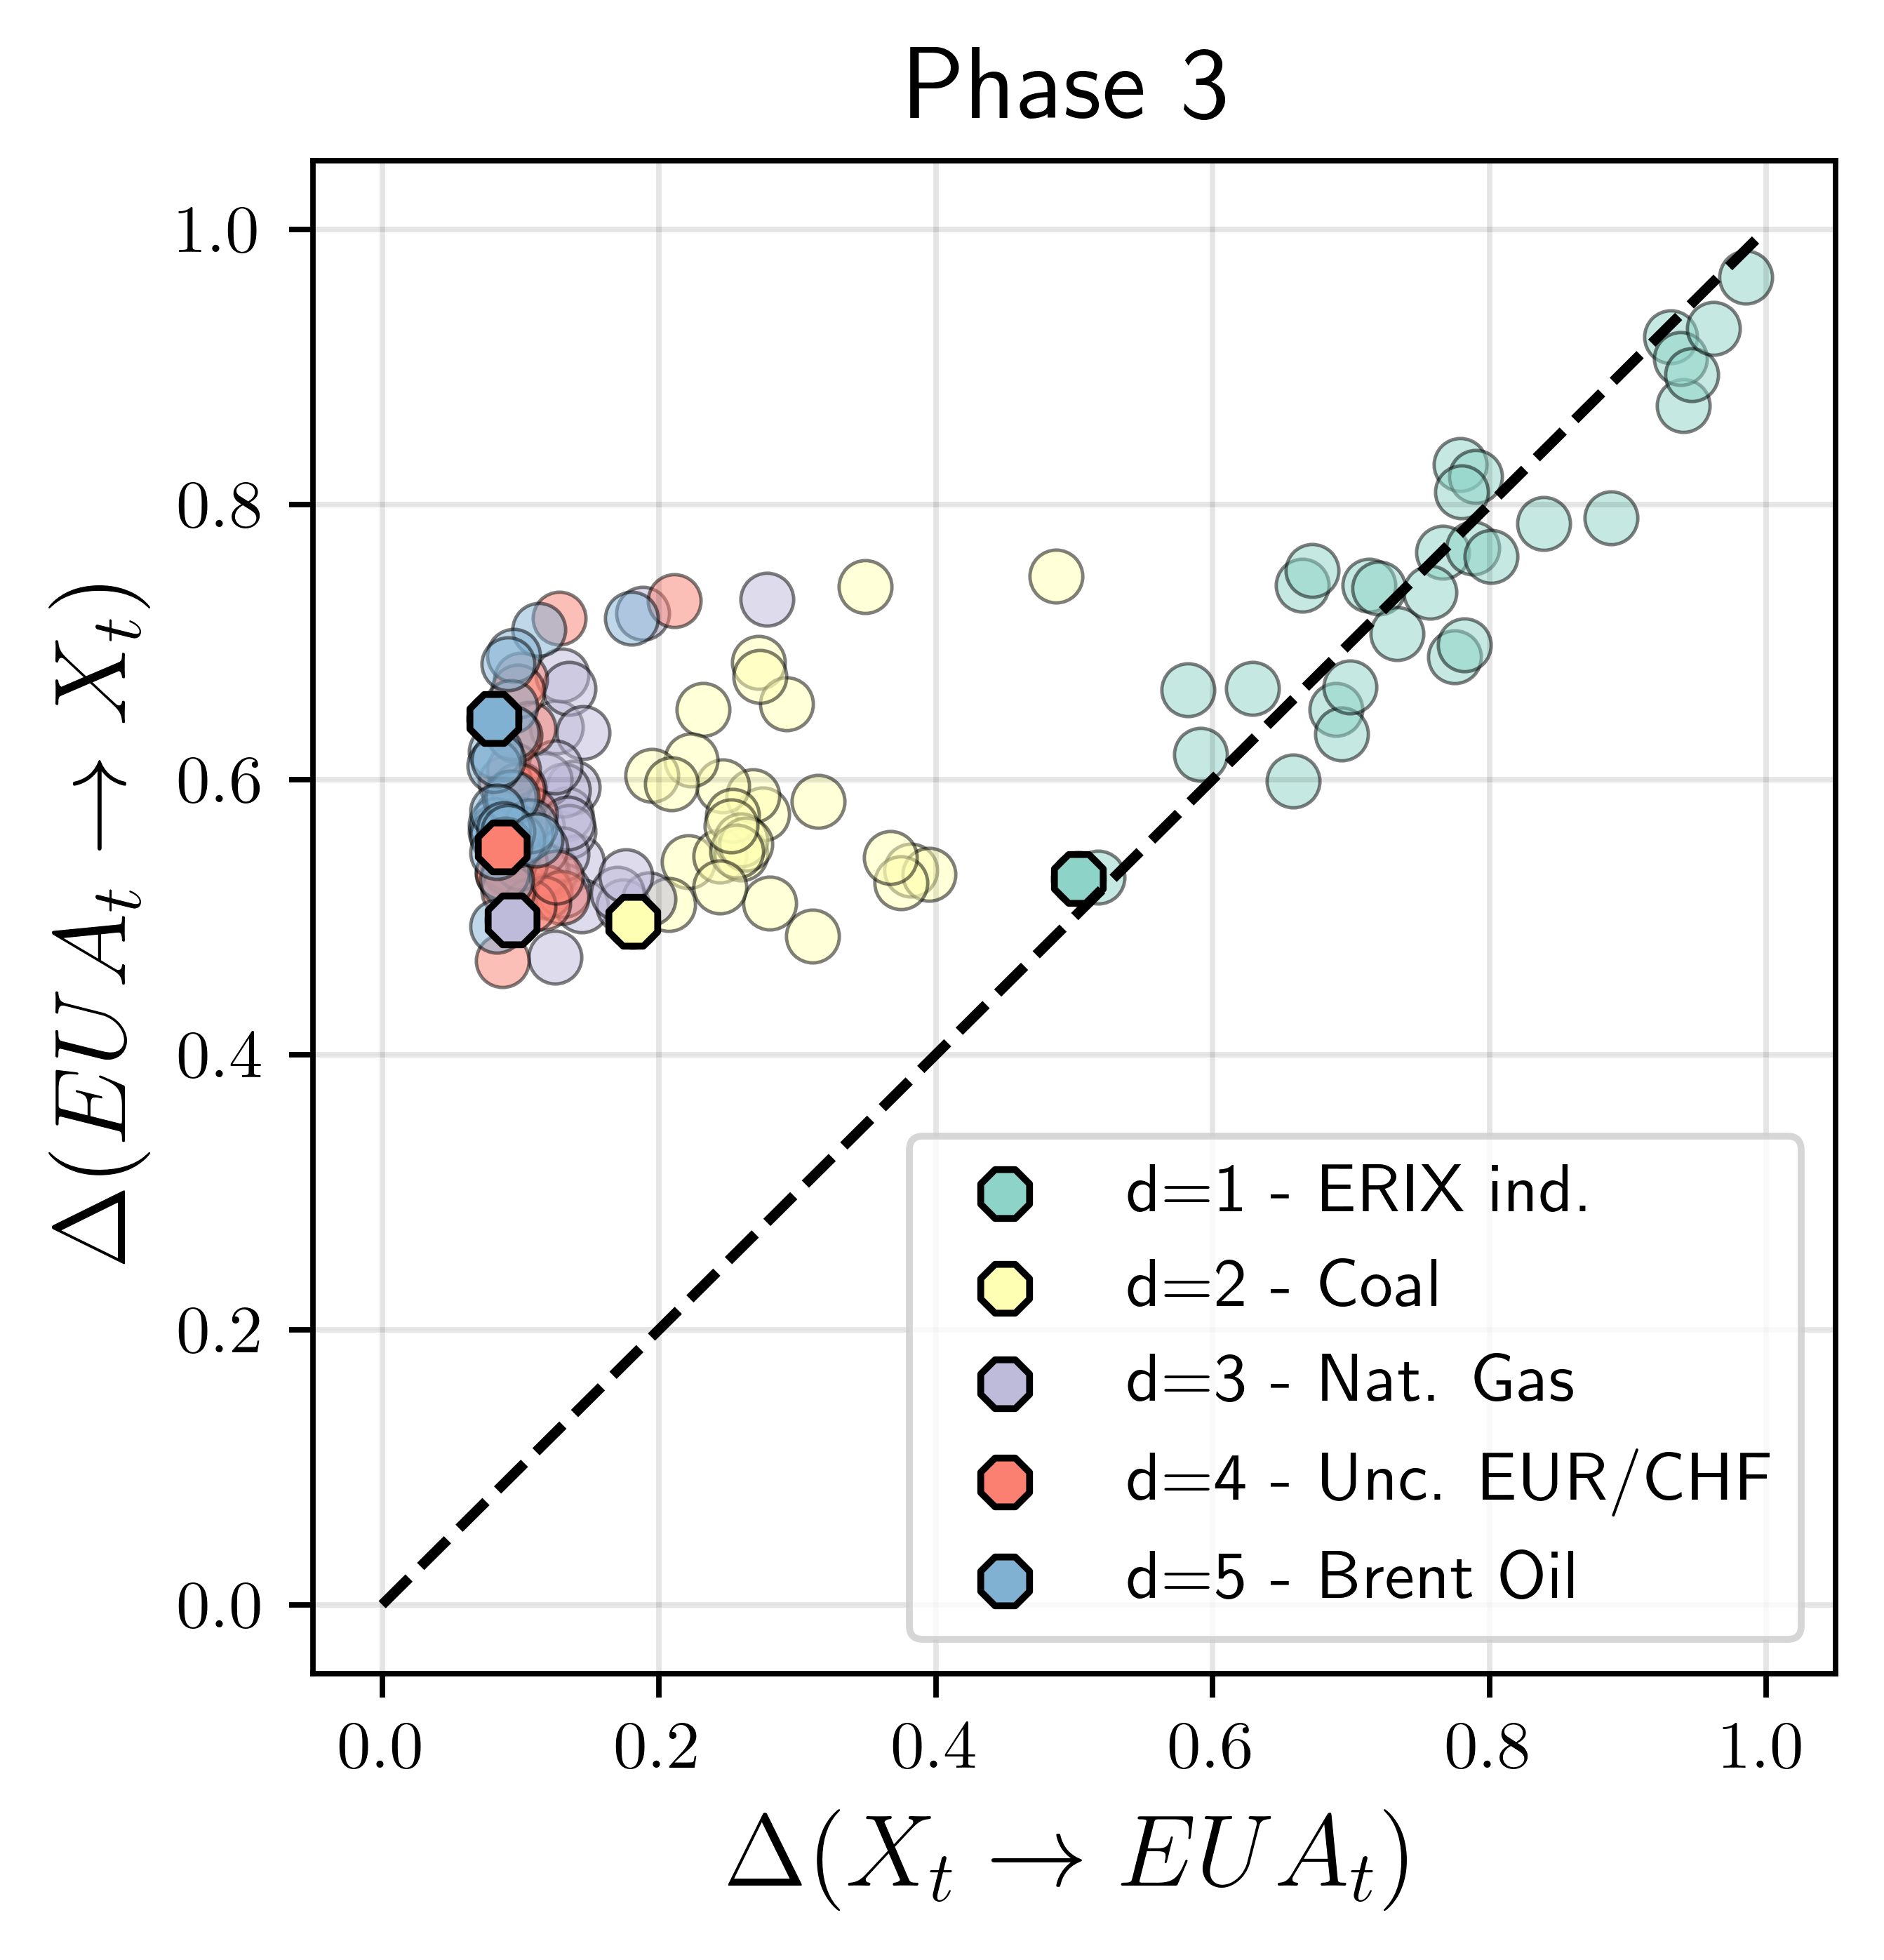

In [48]:
bs0 = set([])
ordered_best_set = []
fig, ax = plt.subplots(figsize=(4, 4), dpi = 700)
for i, (imbs, bs, b_imbs) in enumerate(zip(all_imbs_p3[0:5], best_sets_p3[0:5], best_imbs_p3[0:5])):
    label = ""
    bs1 = set(bs)
    bs1=bs1-bs0
    print(bs1)
    ordered_best_set.append(list(bs1)[0])
    bs0=set(bs)
    for idx in bs1:
        label=X_labels[idx]
    plt.scatter(imbs[1], imbs[0],color=colors2[i], s=60, edgecolor ='k', marker = "o", alpha=0.50, zorder=1, linewidths=0.5)
    plt.scatter(b_imbs[1],b_imbs[0],color=colors2[i], s=60, edgecolor ='k', label = "d=" + str(i+1) + " - " + label, marker = "8", zorder=2)
plt.plot([0, 1], 'k--')
plt.xlabel(r'$\Delta(X_{t} \rightarrow EUA_{t})$', fontsize=15)
plt.ylabel(r'$\Delta(EUA_{t}\rightarrow X_{t})$', fontsize=15)
plt.title('Phase 3', fontsize=15)
plt.legend(ncol=1, fontsize=10)
plt.grid(axis='both',color="black", alpha=.1)
fig.savefig('../Figures/Fig6_2_1_GreedyOpt34.png', dpi=700, bbox_inches='tight')


Figure 6: Information Imbalance analysis of Phase 3 and Phase 4 EUA price determinants. This plot displays the greedy optimisation used to select the most informative variables for Phase 3.

In [49]:
ordered_best_set = np.array(ordered_best_set)
labels = X_labels[ordered_best_set]
best_imbs_p3 = best_imbs_p3[0:10]

In [50]:
print(best_imbs_p3.shape)

(10, 2)


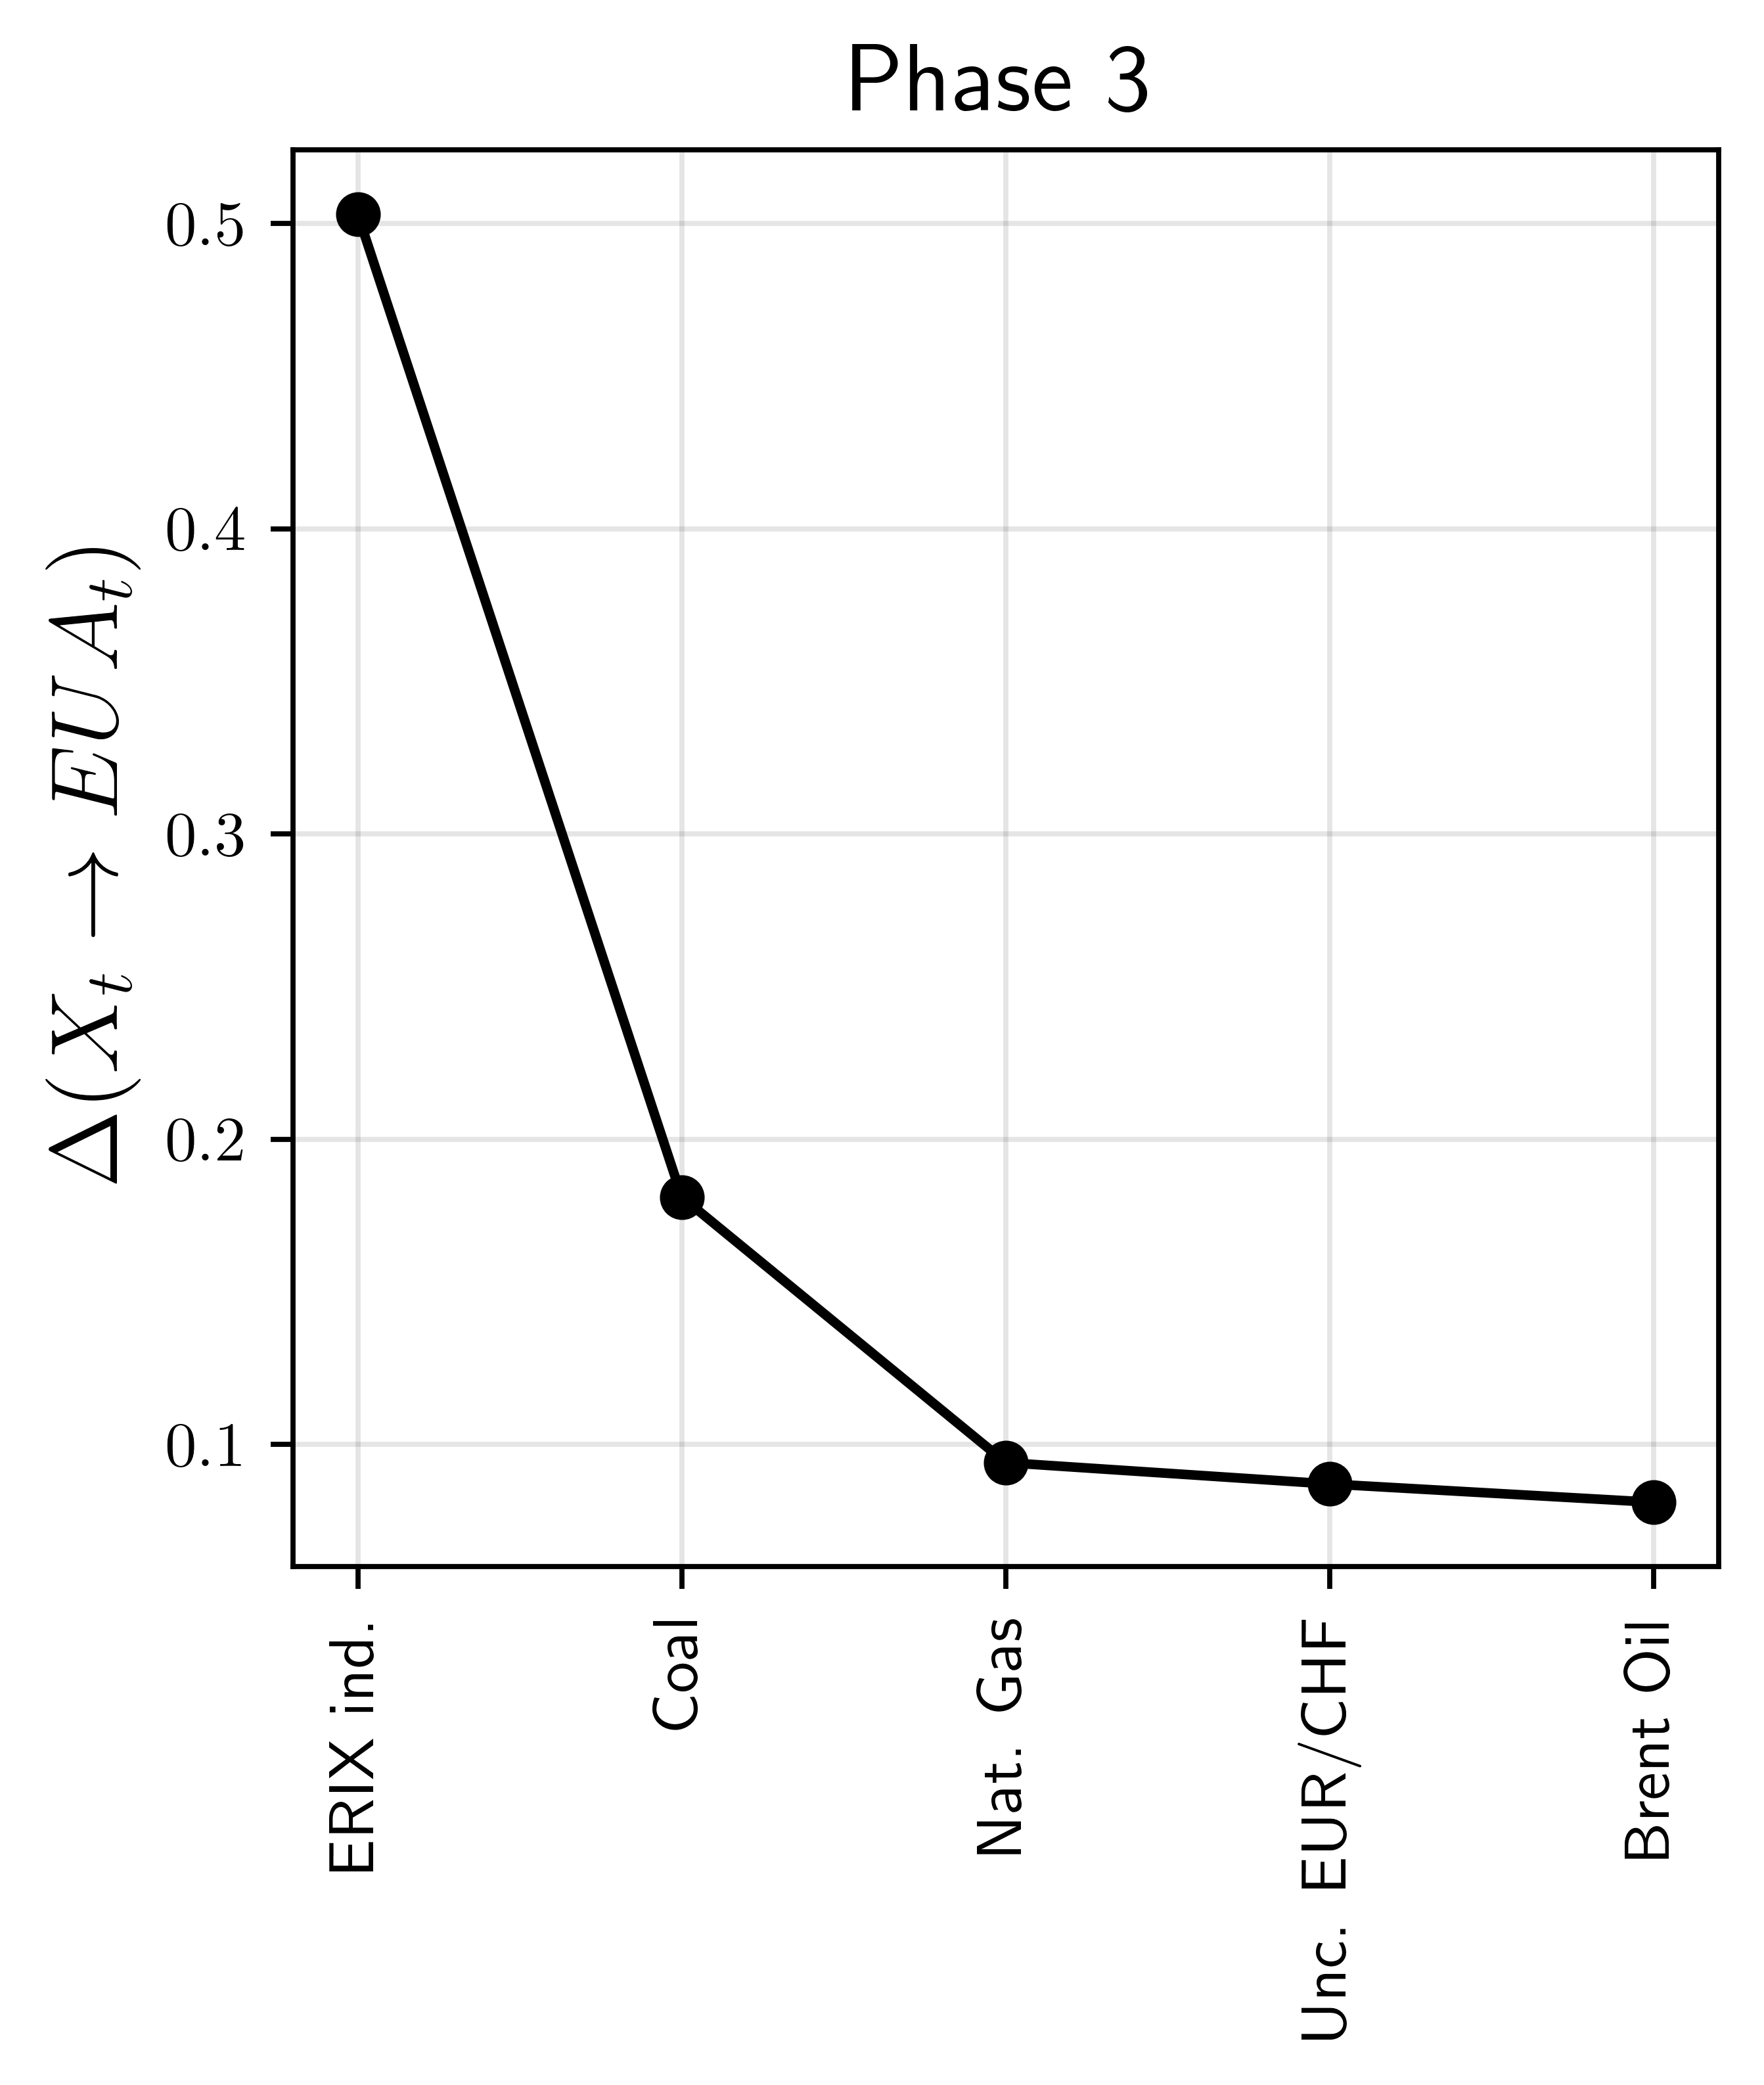

In [51]:
plt.figure(figsize=(4, 4), dpi = 700)
plt.plot(labels, best_imbs_p3[0:5, 1], '-o',  color ='k') # sono 10 non 5 ricordati!!
plt.ylabel(r'$\Delta(X_{t} \rightarrow EUA_{t})$', fontsize=15)
plt.xticks(rotation=90)
plt.grid(axis='both',color="black", alpha=.1)
plt.title('Phase 3', fontsize=15)
plt.savefig('../Figures/Fig6_1_1_Convergences34.png', dpi=700, bbox_inches='tight')

Figure 6: Information Imbalance analysis of Phase 3 and Phase 4 EUA price determinants. This plot shows the Imbalance from the predictors set to the EUA price, for Phase 3.

In [52]:
eua_p4 = eua[1782:]
X_p4 = X[1782:,:]

d_t_p4 = Data(eua_p4+np.random.normal(0, 1e-3, size=eua_p4.shape), maxk = eua_p4.shape[0]-1)
d_t_p4.compute_distances()

d_X_phase_4 = Data(X_p4+np.random.normal(0, 1e-3, size=X_p4.shape), maxk = X_p4.shape[0]-1)
d_X_phase_4.compute_distances()

best_sets_p4, best_imbs_p4, all_imbs_p4 = d_X_phase_4.greedy_feature_selection_target(target_ranks = d_t_p4.dist_indices, 
                                          n_coords=10, 
                                          k = 1, n_best=1, symm = False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/dadapy/metric_comparisons.py:60: UserWarning: data type is float64: most methods work only with float-type inputs
  super().__init__(


total number of computations is:  31
total number of computations is:  30
total number of computations is:  29
total number of computations is:  28
total number of computations is:  27
total number of computations is:  26
total number of computations is:  25
total number of computations is:  24
total number of computations is:  23
total number of computations is:  22


{5}
{2}
{12}
{3}
{15}


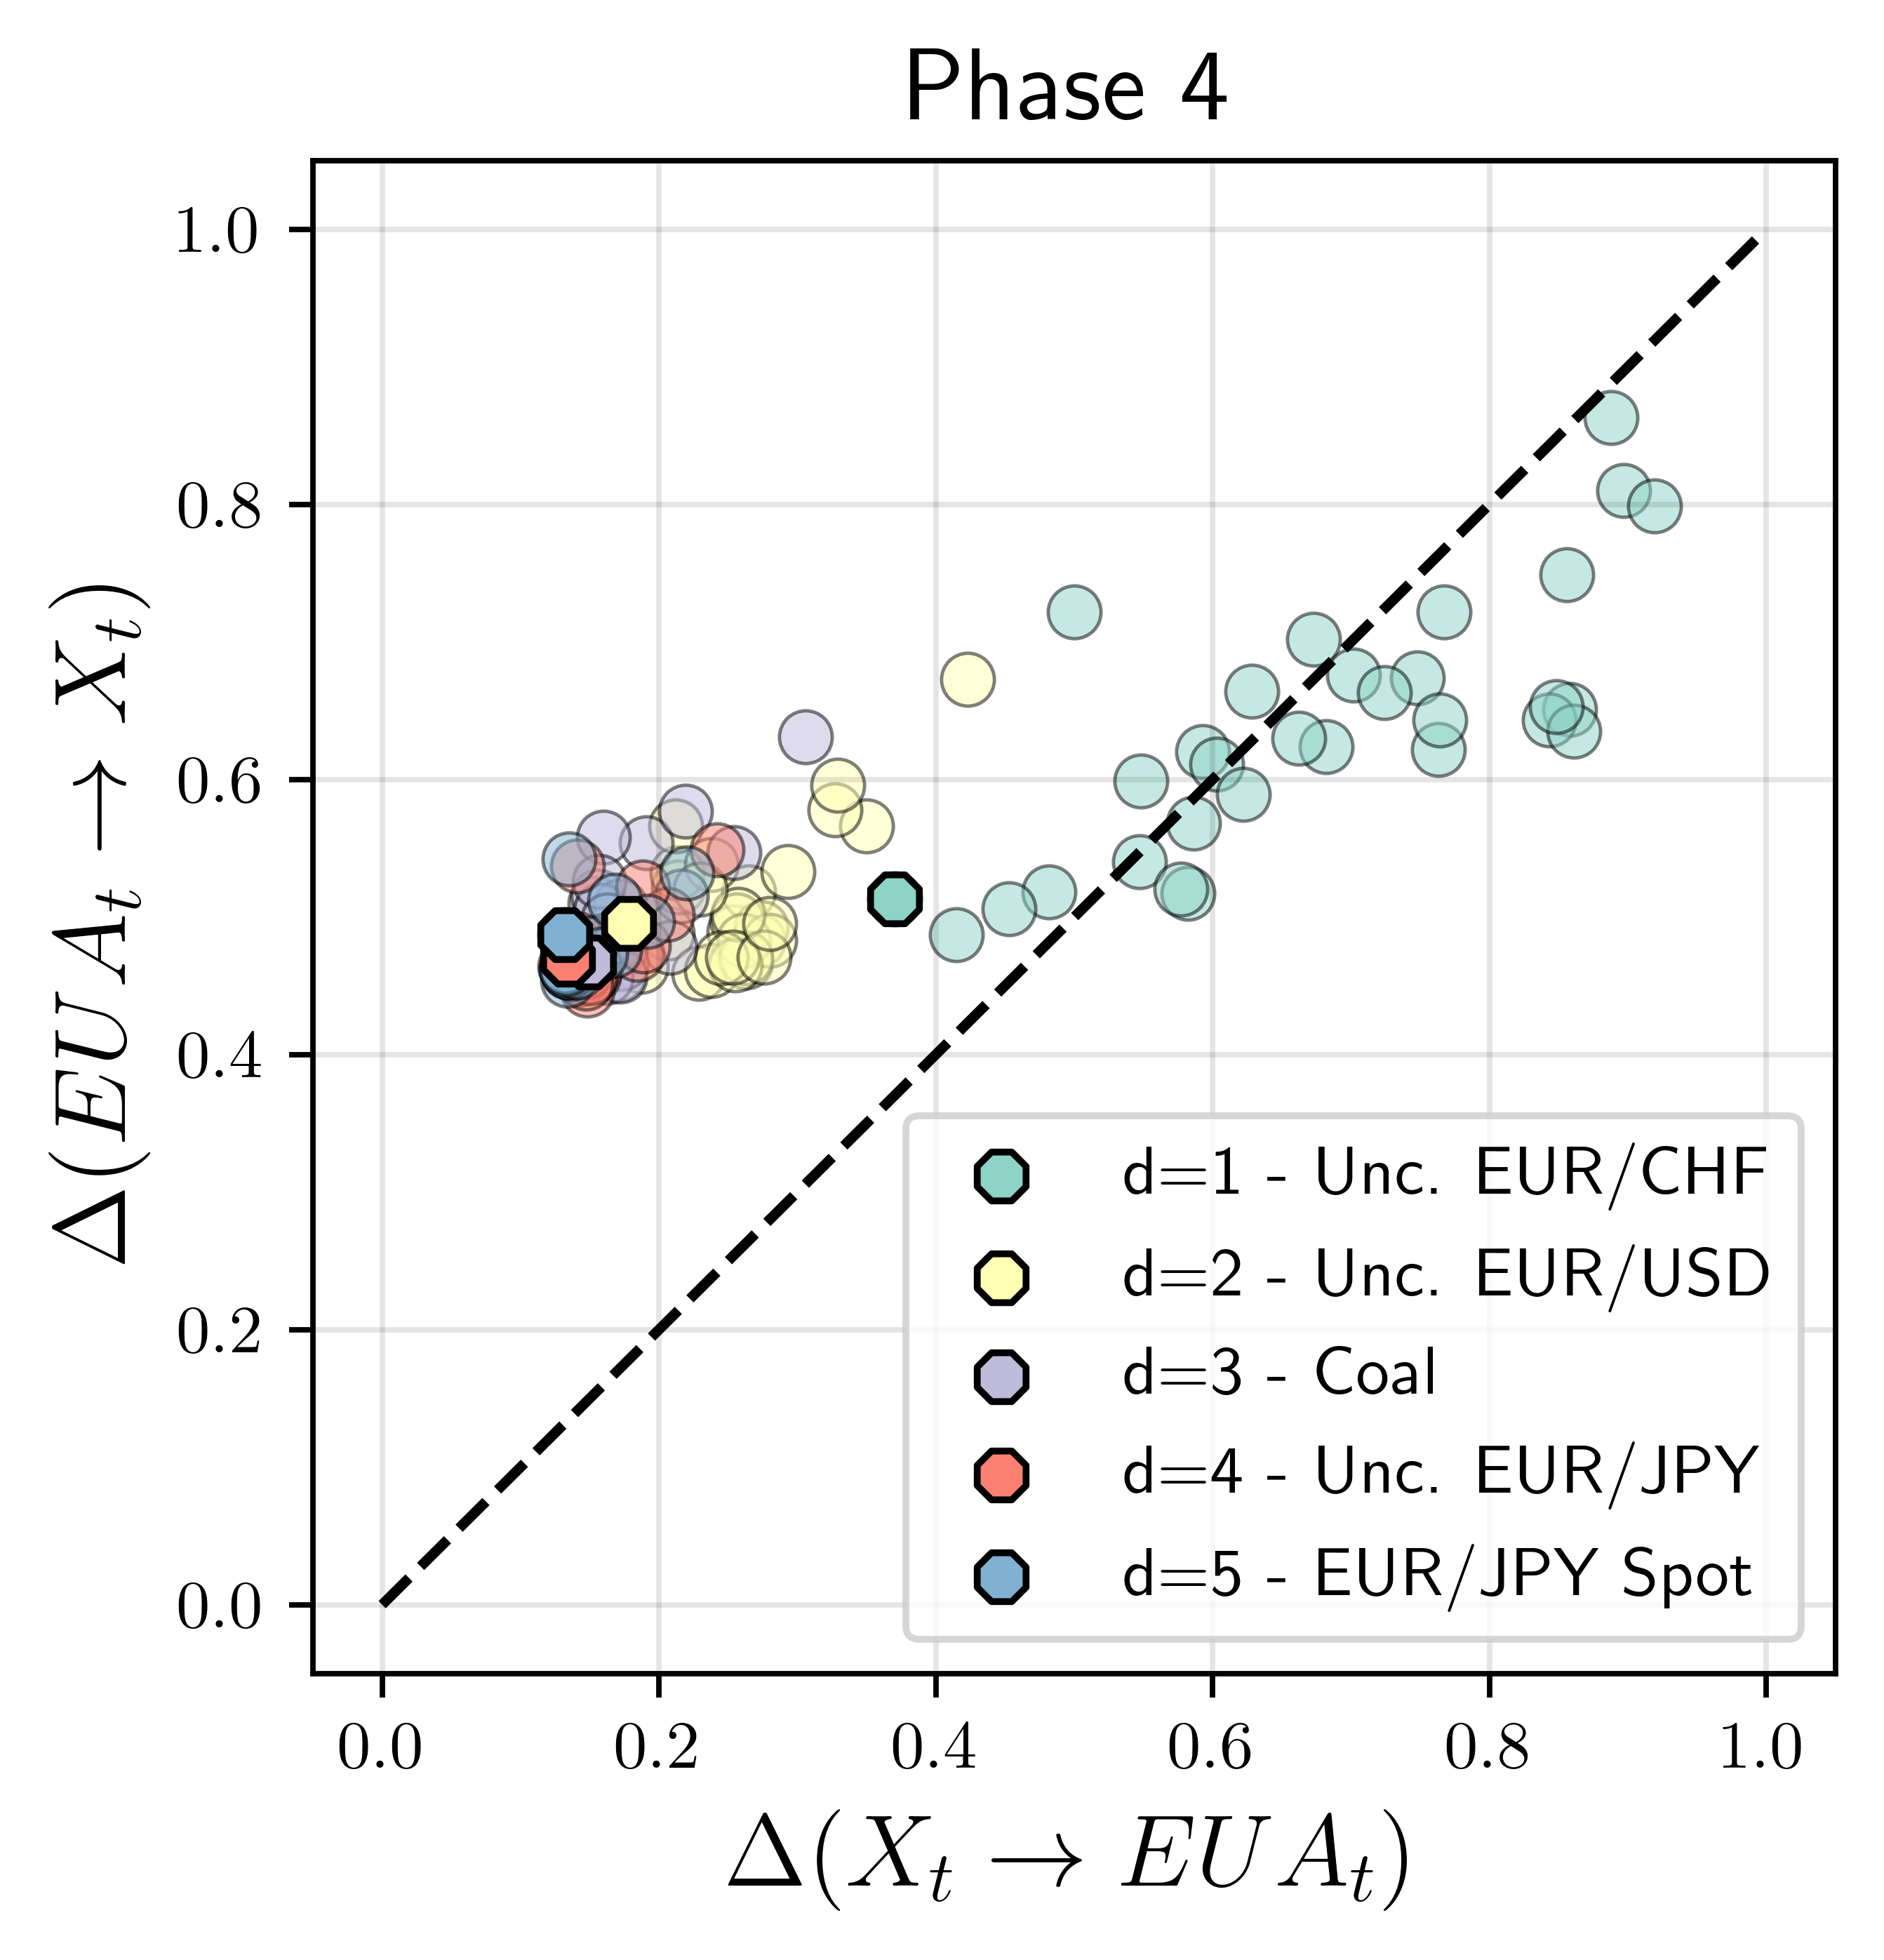

In [53]:
bs0 = set([])
ordered_best_set = []
fig, ax = plt.subplots(figsize=(4, 4), dpi = 700)
for i, (imbs, bs, b_imbs) in enumerate(zip(all_imbs_p4[0:5], best_sets_p4[0:5], best_imbs_p4[0:5])):
    label = ""
    bs1 = set(bs)
    bs1=bs1-bs0
    print(bs1)
    ordered_best_set.append(list(bs1)[0])
    bs0=set(bs)
    for idx in bs1:
        label=X_labels[idx]
    plt.scatter(imbs[1], imbs[0],color=colors2[i], s=60, edgecolor ='k', marker = "o", alpha=0.50, zorder=1, linewidths=0.5)
    plt.scatter(b_imbs[1],b_imbs[0],color=colors2[i], s=60, edgecolor ='k', label = "d=" + str(i+1) + " - " + label, marker = "8", zorder=2)
plt.plot([0, 1], 'k--')
plt.xlabel(r'$\Delta(X_{t} \rightarrow EUA_{t})$', fontsize=15)
plt.ylabel(r'$\Delta(EUA_{t}\rightarrow X_{t})$', fontsize=15)
plt.title('Phase 4', fontsize=15)
plt.legend(ncol=1, fontsize=10)
plt.grid(axis='both',color="black", alpha=.1)
fig.savefig('../Figures/Fig6_2_2_GreedyOpt34.png', dpi=700, bbox_inches='tight')

Figure 6: Information Imbalance analysis of Phase 3 and Phase 4 EUA price determinants. This plot displays the greedy optimisation used to select the most informative variables for Phase 4.

In [54]:
ordered_best_set = np.array(ordered_best_set)
labels = X_labels[ordered_best_set]

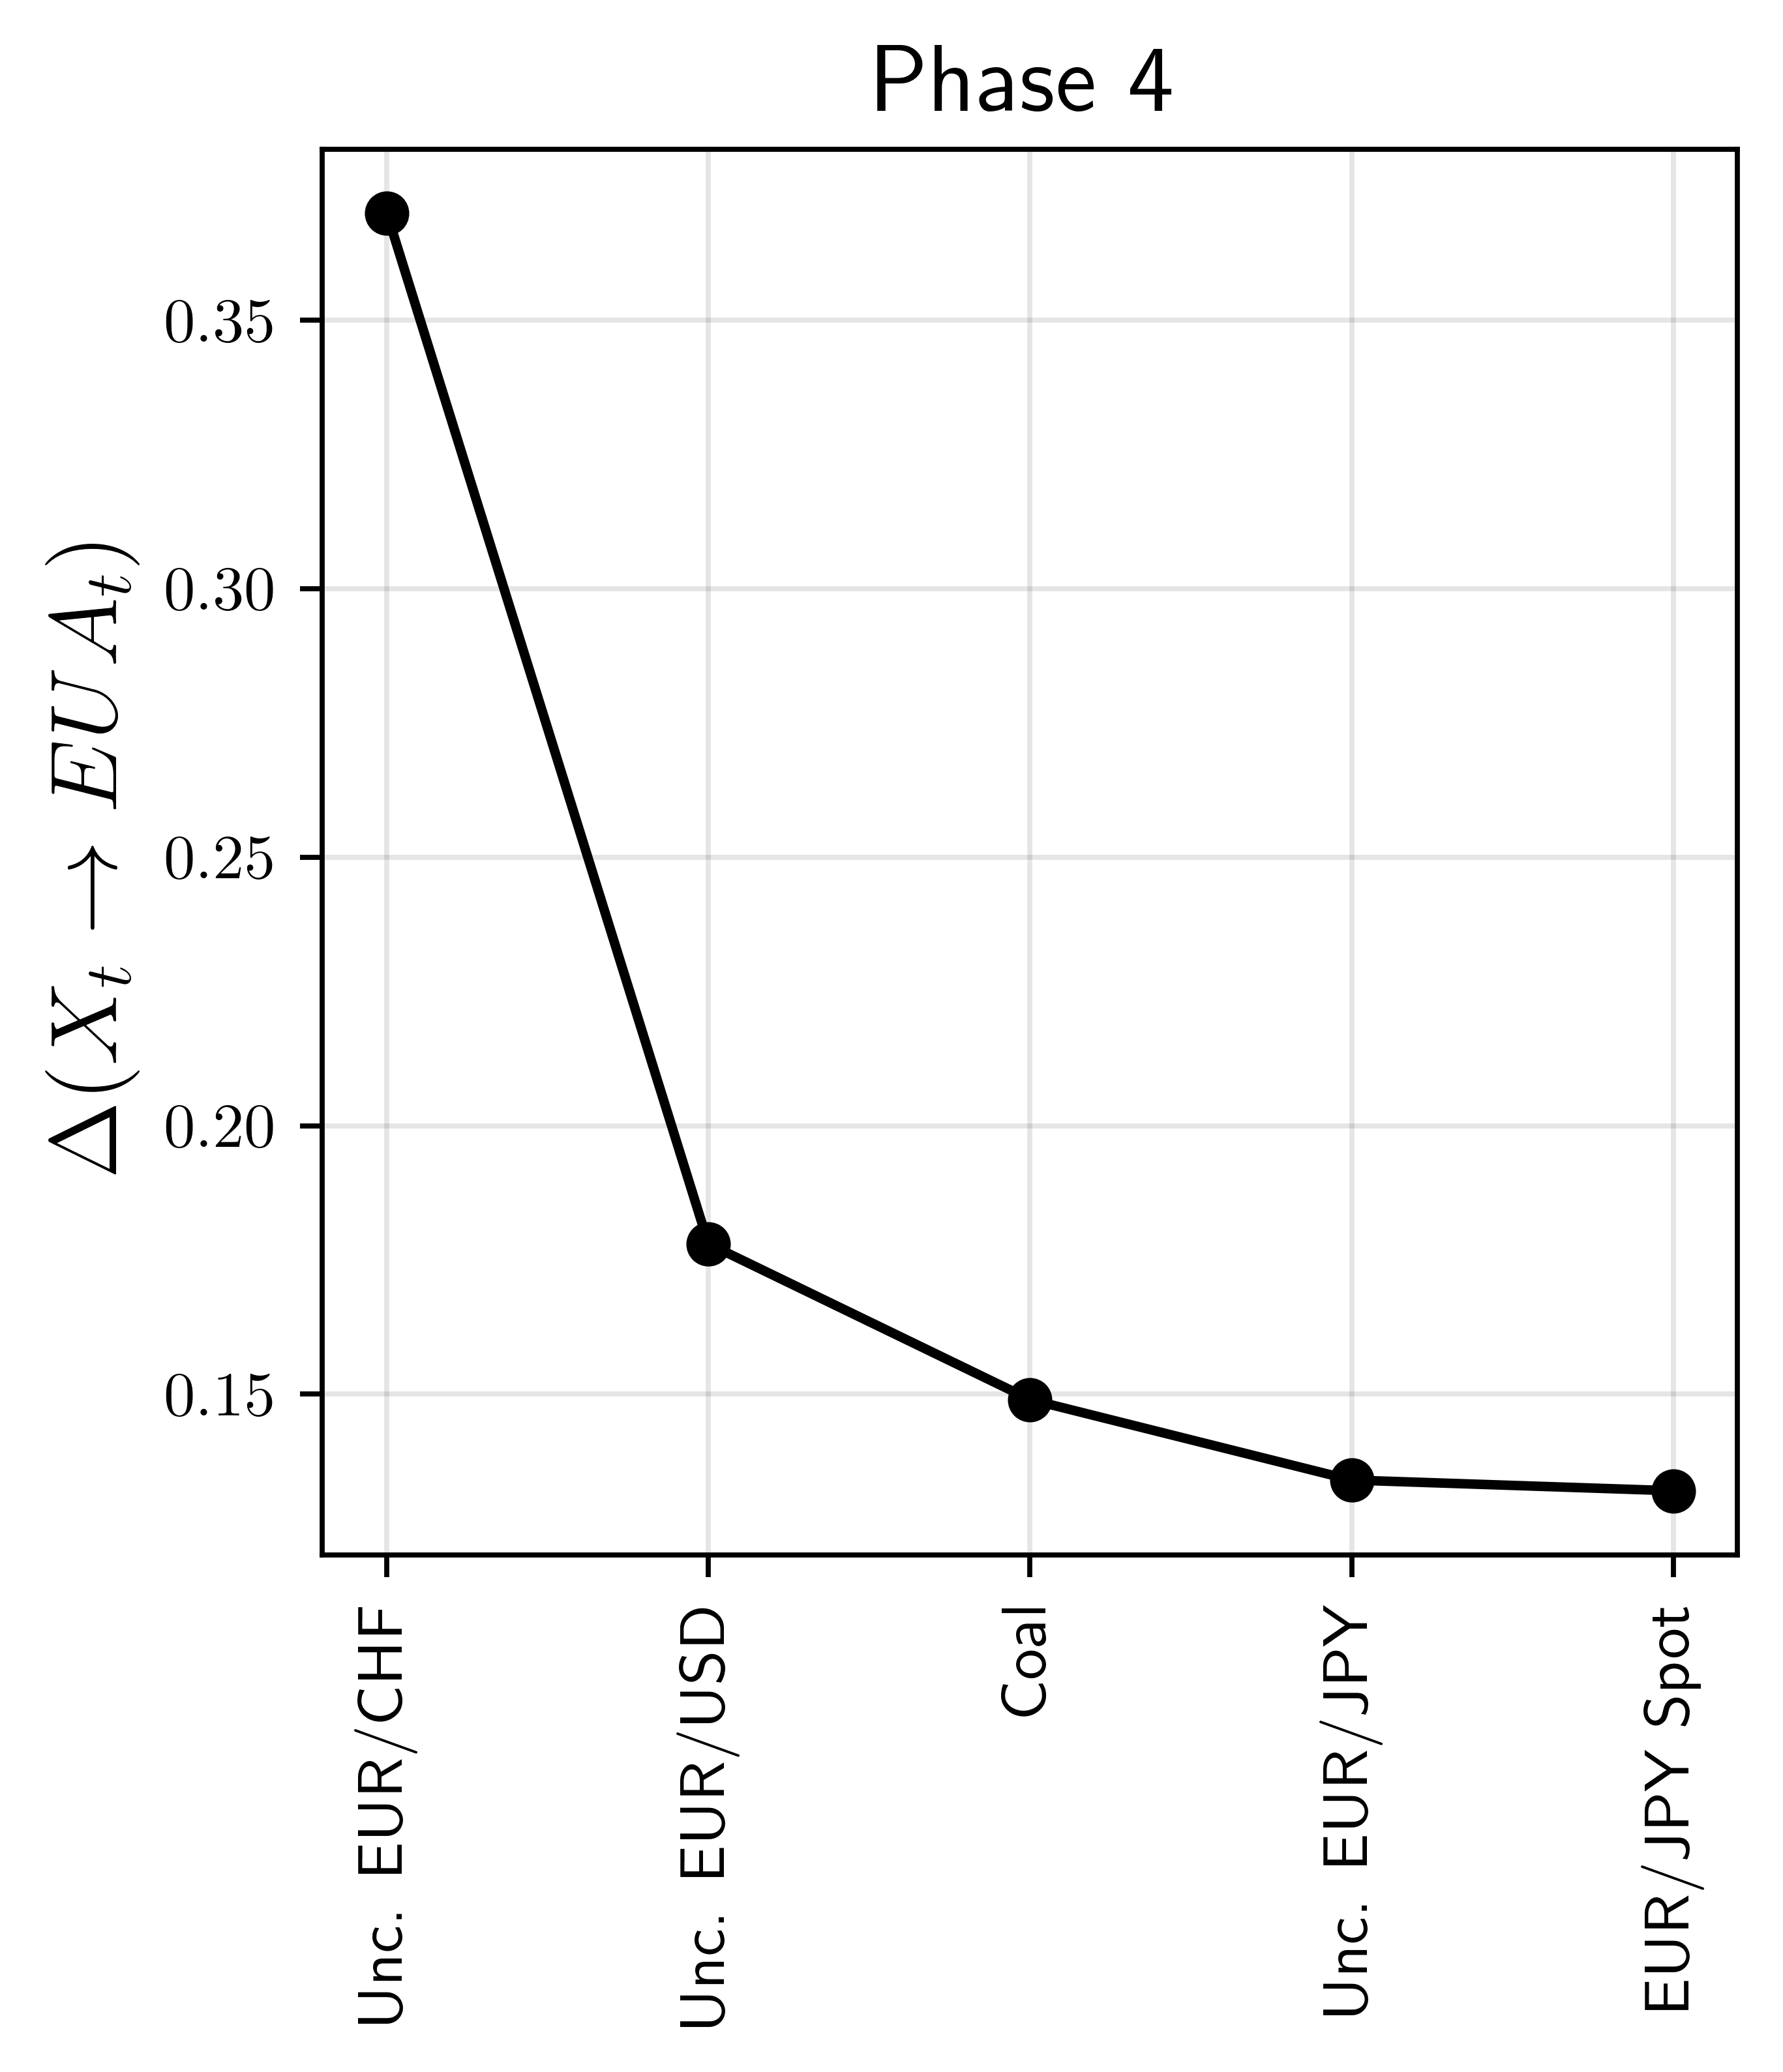

In [55]:
plt.figure(figsize=(4, 4), dpi = 700)
plt.plot(labels, best_imbs_p4[0:5, 1], '-o',  color ='k')
plt.grid(axis='both',color="black", alpha=.1)
plt.title('Phase 4', fontsize=15)
plt.xticks(rotation=90)
plt.ylabel(r'$\Delta(X_{t} \rightarrow EUA_{t})$', fontsize=15)
plt.savefig('../Figures/Fig6_1_2_Convergences34.png', dpi=700, bbox_inches='tight')


Figure 6: Information Imbalance analysis of Phase 3 and Phase 4 EUA price determinants. This plot shows the Imbalance from the predictors set to the EUA price, for Phase 4.

***